<a href="https://colab.research.google.com/github/Salveankit/Mobile-Price-Range-Prediction-Classification-/blob/main/classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Phone Price Range Prediction Classification



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Ankit Salve

# **Project Summary -**

## Mobile Phone Price Range Prediction Classification

The Mobile Phone Price Range Prediction Classification project is a machine learning project that aims to predict the price range category of mobile phones based on their features. The goal is to categorize mobile phones into different price ranges, providing insights into the factors influencing their prices rather than predicting the exact price.


The project involves developing a classification model using machine learning techniques to predict the price range category of mobile phones. By leveraging a dataset that includes mobile phone features and their corresponding price range categories, the model learns patterns and relationships between the features and price ranges.

The key steps of the project include:

1. Exploratory Data Analysis (EDA): Conducting EDA to gain insights into the dataset, such as understanding feature distributions, detecting correlations, identifying outliers, and exploring patterns within the data.

2. Feature Engineering: Selecting relevant features and performing any necessary transformations or creating new features to enhance the model's predictive power.

3. Model Selection and Training: Choosing an appropriate classification algorithm, such as decision trees, random forests, logistic regression, or neural networks, and training the model using the labeled data.

4. Model Evaluation: Assessing the performance of the trained model using evaluation metrics and techniques to ensure its accuracy and generalization ability.

5. Prediction and Deployment: Applying the trained model to new, unseen mobile phone data to predict their price range categories. These predictions can provide valuable insights for businesses, guiding pricing strategies, market positioning, and product development decisions.

### Project Benefits

The Mobile Phone Price Range Prediction Classification project offers several benefits:

1. Insights into Pricing Dynamics: The project helps businesses understand the factors influencing mobile phone prices, enabling them to make informed decisions regarding pricing strategies in the competitive mobile phone market.

2. Data-Driven Decision-Making: By leveraging machine learning techniques, the project empowers businesses to make data-driven decisions related to market positioning, product development, and targeted marketing campaigns.

3. Increased Efficiency: Automating the price range prediction process using machine learning models reduces the need for manual analysis and speeds up decision-making processes.





The Mobile Phone Price Range Prediction Classification project facilitates data-driven decision-making in the mobile phone market, helping businesses understand pricing dynamics and optimize their strategies.

# **GitHub Link -**

https://github.com/Salveankit/Mobile-Price-Range-Prediction-Classification-.git

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import sqrt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import PowerTransformer
from scipy.stats import iqr

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
# Load Dataset
# Importing Data
url='https://drive.google.com/file/d/1W5w52BjA3ei9CrTMbPN4J7qXUjwBaNqB/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)


### Dataset First View

In [3]:
# Dataset First Look
# first few entries
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f'the rows and columns in dataset is {df.shape}')

the rows and columns in dataset is (2000, 21)


### Dataset Information

In [5]:
# Dataset Info
# Mobile price range Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


<Axes: >

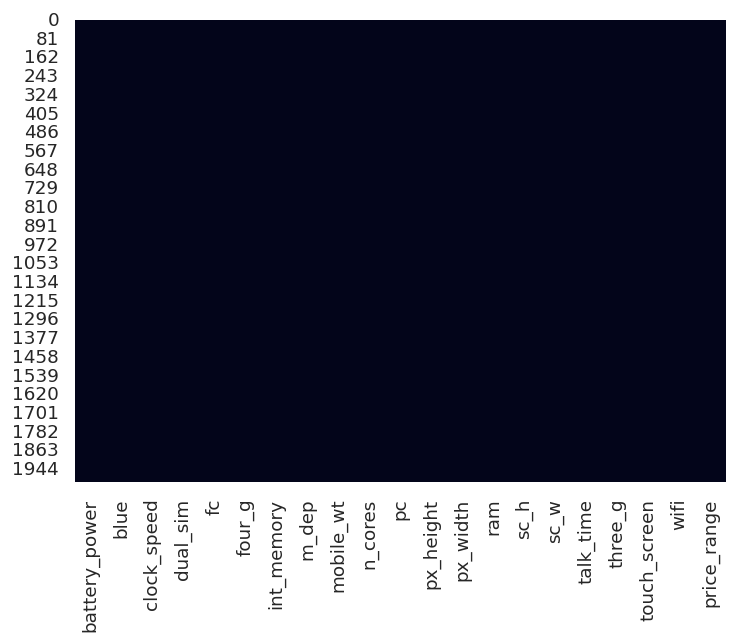

In [8]:
# Visualizing the missing values
# to visualize missing data we can use the heatmap method.

# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":120, "figure.figsize":(7,5)})
sns.heatmap(df.isnull(), cbar=False)

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns name
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
# Dataset Describe returns descriptive statistics of the dataframe
df.describe([0.25,0.75,0.95,0.99]).T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%      95%      99%     max  
battery_power  1615.25  1930.15  1987.00  1998.0  
blue              1.00     1.00     1.00     1.0  
clock_speed       2.20     2.80     3.00     3.0  
dual_sim          1.00     1.00     1.00     1.0  
fc                7.00    13.00    16.00    19.0  
four_g            1.00     1.00     1.00     1.0  
int_memory       48.00    61.00    64.00    64.0  
m_dep             0.80     1.00     1.00     1.0  
mobile_wt       170.00   196.00   199.00   200.0  
n_cores           7.00     8.00     8.00     8.0  
pc               15.00    20.00    20.00    20.0  
px_height       947.25  1485.05  1791.01  1960.0  
px_width       1633.00  1929.05  1987.00  1998.0  
ram            3064.50  3826.35  3958.01  3998.0  
sc_h             16.00    19.00    19.00    19.0  
sc_w              9.00    14.00    17.00    18.0  
talk_time        16.00    20.00    20.00    20.0  
three_g           1.00     1.00     1.00     1.0  
touch_screen      1.00     1.00     1.00     1.0  
wifi              1.00     1.00     1.00     1.0  
price_range       2.25     3.00     3.00     3.0

### Variables Description

**The variables listed are the attributes or features of an mobile phone present in the dataset.**

Here is a description of the variables in the given mobile price prediction dataset:

1. **battery_power**: Total energy (mAh) that a mobile phone battery can store.

2. **blue**: Binary variable indicating the presence (1) or absence (0) of Bluetooth functionality.

3. **clock_speed**: Speed at which the microprocessor of the mobile phone operates.

4. **dual_sim**: Binary variable indicating whether the mobile phone supports dual SIM cards (1) or not (0).

5. **fc**: Front camera megapixels.

6. **four_g**: Binary variable indicating whether the mobile phone supports 4G connectivity (1) or not (0).

7. **int_memory**: Internal memory (in gigabytes) available for storing user data.

8. **m_dep**: Mobile depth (in cm), representing the thickness of the mobile phone.

9. **mobile_wt**: Weight of the mobile phone (in grams).

10. **n_cores**: Number of cores of the mobile phone processor.

11. **pc**: Primary camera megapixels.

12. **px_height**: Pixel resolution height of the mobile phone screen.

13. **px_width**: Pixel resolution width of the mobile phone screen.

14. **ram**: Random Access Memory (RAM) of the mobile phone (in megabytes).

15. **sc_h**: Screen height of the mobile phone (in cm).

16. **sc_w**: Screen width of the mobile phone (in cm).

17. **talk_time**: Longest time (in hours) that the mobile phone battery can last with a single charge.

18. **three_g**: Binary variable indicating whether the mobile phone supports 3G connectivity (1) or not (0).

19. **touch_screen**: Binary variable indicating whether the mobile phone has a touch screen (1) or not (0).

20. **wifi**: Binary variable indicating whether the mobile phone supports Wi-Fi connectivity (1) or not (0).

21. **price_range**: The target variable that represents the price range of the mobile phone. It is divided into four categories:

  0 (low cost)

  1 (medium cost)

  2 (high cost)

   3 (very high cost)

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
var_list=df.columns.to_list()

print(var_list)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [12]:
# using for loop for getting number of unique values from each column.
for ele in df.columns.to_list():
  print(f'No. of unique values in {ele} is {df[ele].nunique()}.')

No. of unique values in battery_power is 1094.
No. of unique values in blue is 2.
No. of unique values in clock_speed is 26.
No. of unique values in dual_sim is 2.
No. of unique values in fc is 20.
No. of unique values in four_g is 2.
No. of unique values in int_memory is 63.
No. of unique values in m_dep is 10.
No. of unique values in mobile_wt is 121.
No. of unique values in n_cores is 8.
No. of unique values in pc is 21.
No. of unique values in px_height is 1137.
No. of unique values in px_width is 1109.
No. of unique values in ram is 1562.
No. of unique values in sc_h is 15.
No. of unique values in sc_w is 19.
No. of unique values in talk_time is 19.
No. of unique values in three_g is 2.
No. of unique values in touch_screen is 2.
No. of unique values in wifi is 2.
No. of unique values in price_range is 4.


## 3. ***Data Wrangling***

seperating categorical variables

In [13]:
# Categorical features list
categorical_list=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [14]:
# Creating a subset of the dataset with only the selected categorical variables
binary_df = df[categorical_list]

# Printing the separated categorical variables
print(binary_df.head())

   blue  dual_sim  four_g  three_g  touch_screen  wifi
0     0         0       0        0             0     1
1     1         1       1        1             1     0
2     1         1       1        1             1     0
3     1         0       0        1             0     0
4     1         0       1        1             1     0


Extracting numerical list

In [15]:
numerical_list = [col for col in df.columns if col not in categorical_list]
print(numerical_list)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']


### 3.1 Data Cleaning

In [16]:
# To find out count of null values from each column
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [17]:
# There are two entries having px height as 0
df[df['px_height'] == 0]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1481    0.1         99        4  ...          0      1987  3692    13     0   
1933    0.6        154        8  ...          0       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1  

[2 rows x 21 columns]

In [18]:
# Replacing those values with median values
median_value = df[df['px_height'] != 0]['px_height'].median()

df.loc[df['px_height'] == 0, 'px_height'] = median_value

# rechecking the result
df[df['px_height'] == 0]


Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]

Lets find entries with Screen width of the mobile phone as zero

In [19]:
# Find out the number of entries with screen width = 0
df[df['sc_w']==0]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
12             1815     0          2.8         0   2       0          33   
24              503     0          1.2         1   5       1           8   
33             1310     1          2.2         1   0       1          51   
42             1253     1          0.5         1   5       1           5   
50             1547     1          3.0         1   2       1          14   
...             ...   ...          ...       ...  ..     ...         ...   
1918            772     0          1.0         1   0       1          23   
1920            591     1          0.5         1   1       1          16   
1946            590     1          1.2         1   0       0          32   
1954            686     1          2.7         1   0       0          36   
1981           1454     0          2.6         0   8       0           6   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
12      0.6        159        4  ...      607.0       748  1482    18     0   
24      0.4        111        3  ...      201.0      1245  2583    11     0   
33      0.6        100        4  ...      178.0      1919  3845     7     0   
42      0.2        152        2  ...      685.0       714  1878    15     0   
50      0.7        198        3  ...     1042.0      1832  2059     5     0   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1918    0.6         97        7  ...      317.0      1805  2782     7     0   
1920    0.9         90        6  ...      892.0      1603  3746     5     0   
1946    0.4        141        6  ...      227.0       509  1817    10     0   
1954    0.1        194        4  ...       64.0       745  1503    10     0   
1981    0.4        199        3  ...      698.0      1018  1300    10     0   

      talk_time  three_g  touch_screen  wifi  price_range  
12            2        1             0     0            1  
24           12        1             0     0            1  
33           12        1             1     0            3  
42            4        1             1     0            1  
50           15        1             0     1            2  
...         ...      ...           ...   ...          ...  
1918         17        1             0     0            2  
1920          5        1             1     0            3  
1946          6        0             1     0            0  
1954         13        0             0     0            0  
1981          2        0             0     1            1  

[180 rows x 21 columns]

There are 180 rows having Screen width of the mobile phone as zero which is practically not possible./

In [20]:
# Replacing those values with median values
df.loc[df['sc_w'] == 0, 'sc_w'] = df['sc_w'].median()

# lets cross check number of entries with 0 value
df[df['sc_w']==0]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]

# ***4. Data Vizualization Analysis***

### **4.1 Univariate Analysis**

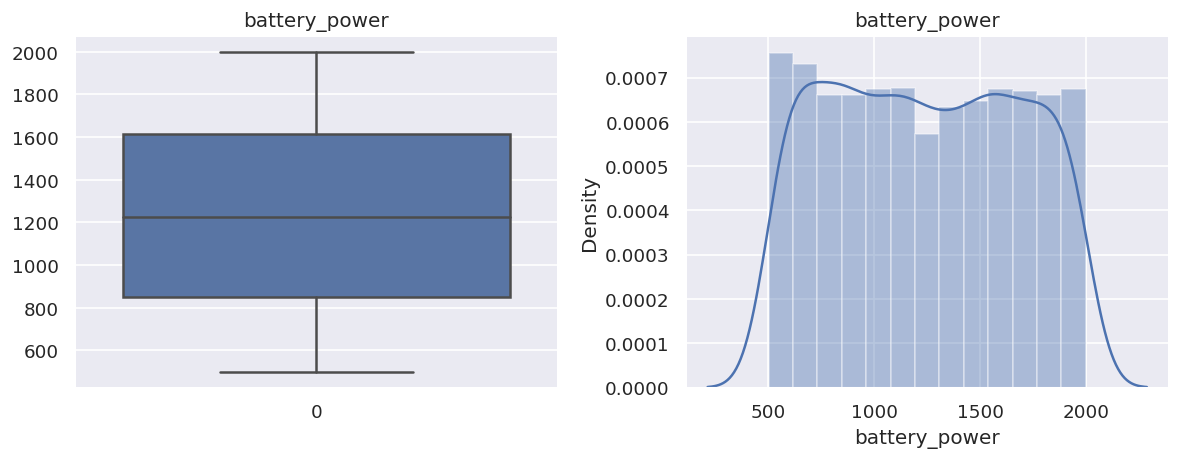

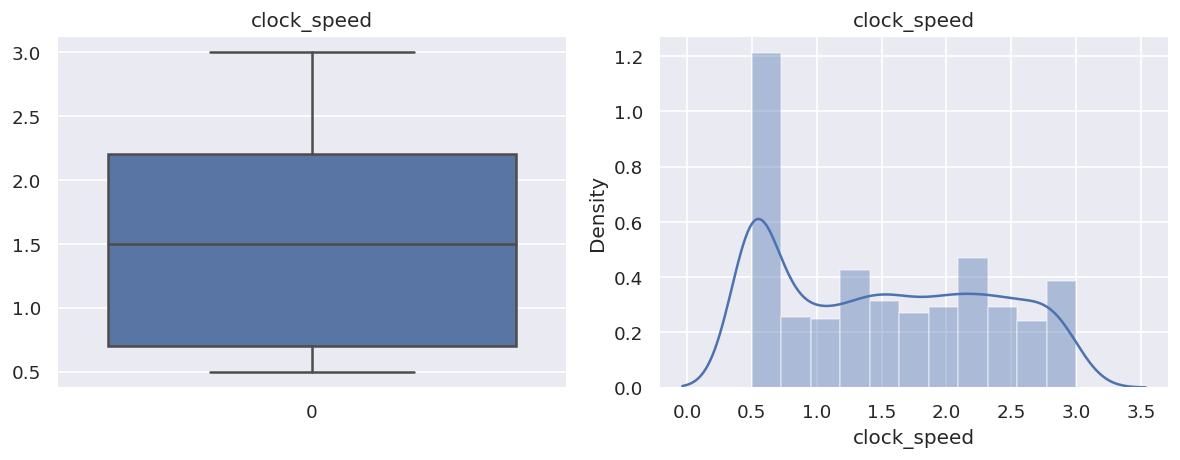

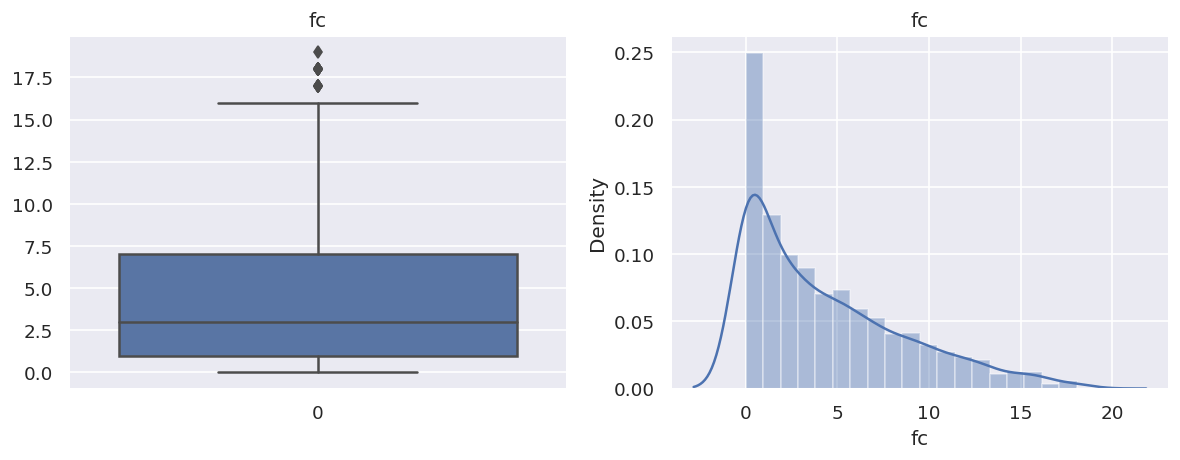

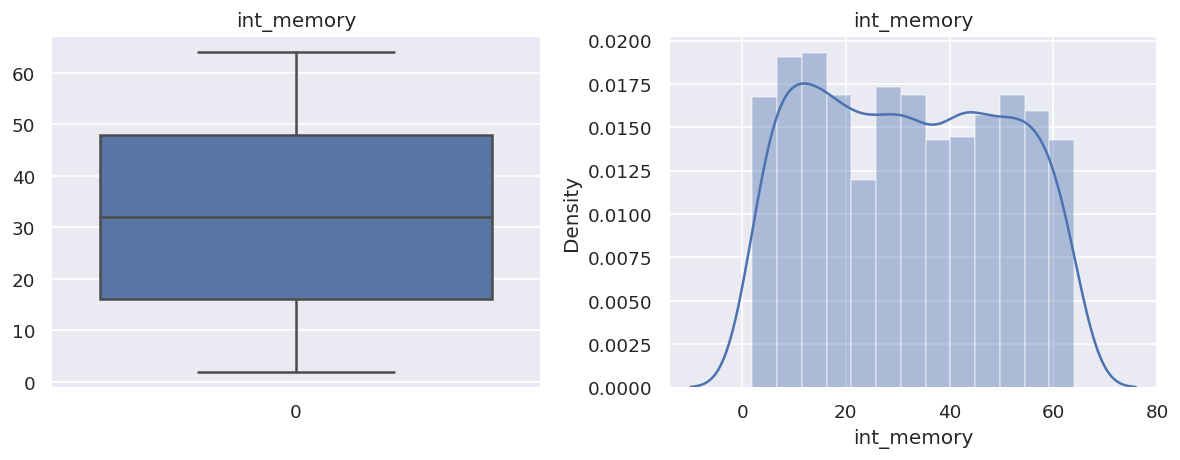

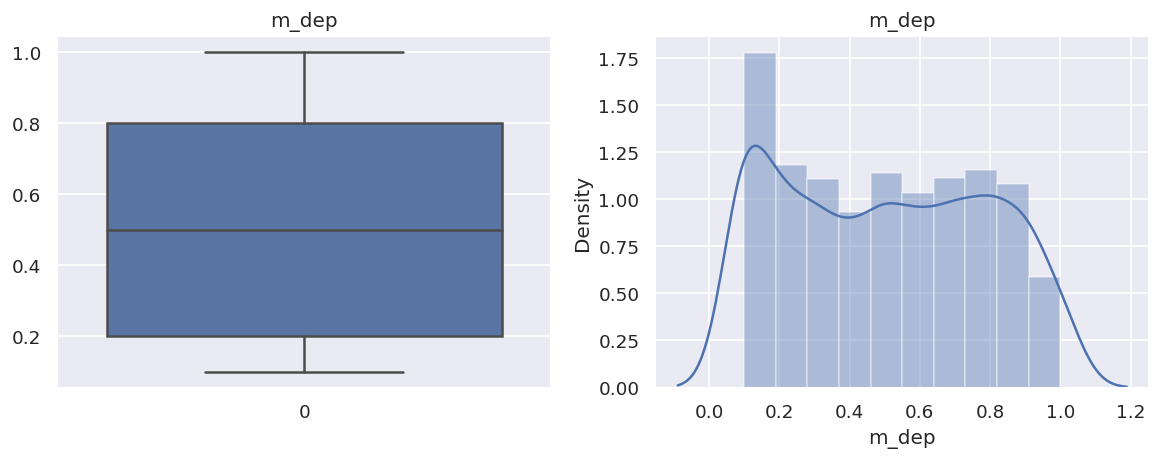

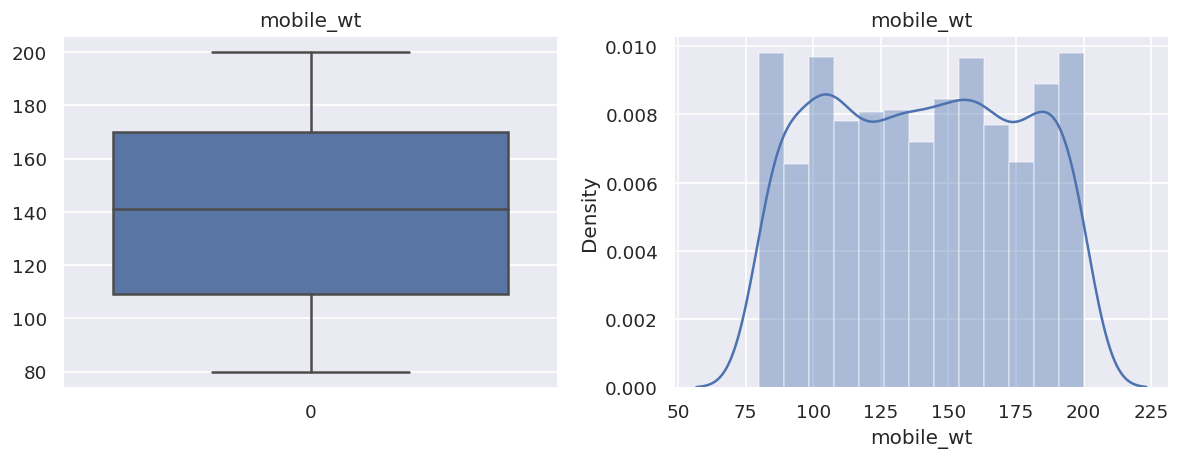

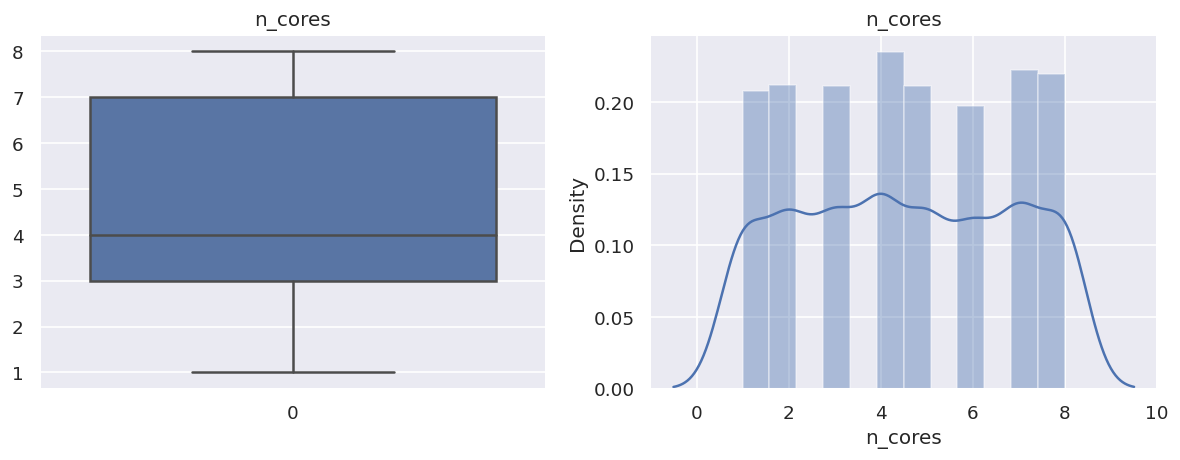

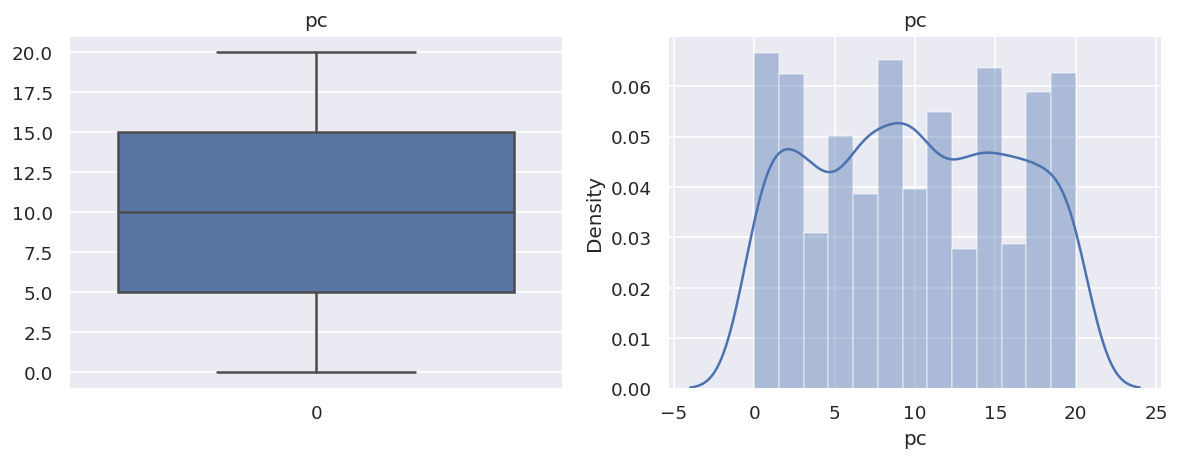

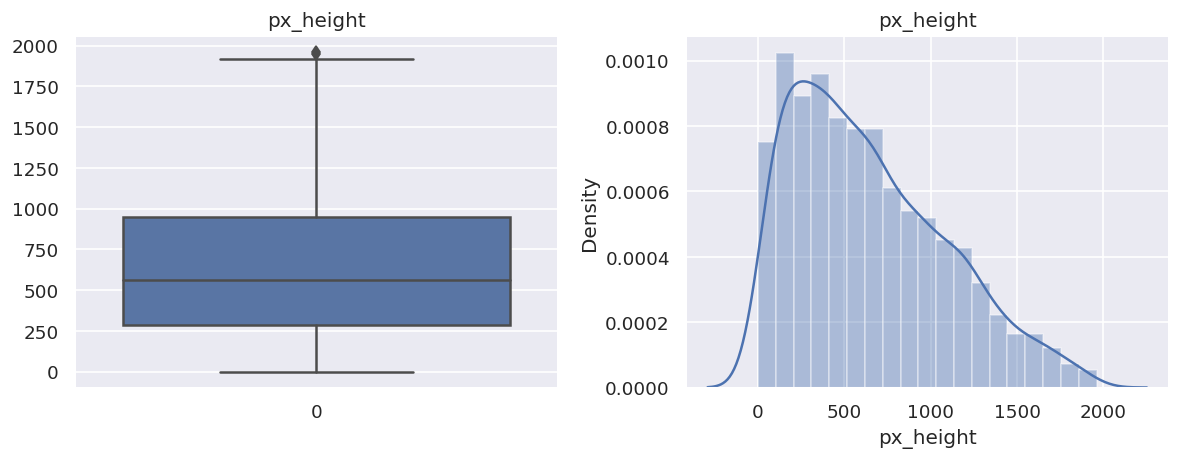

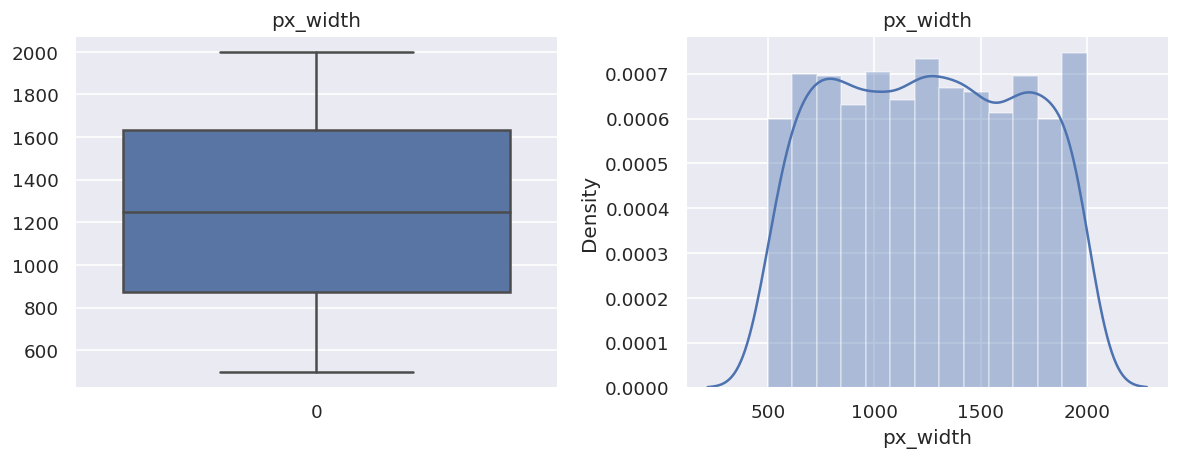

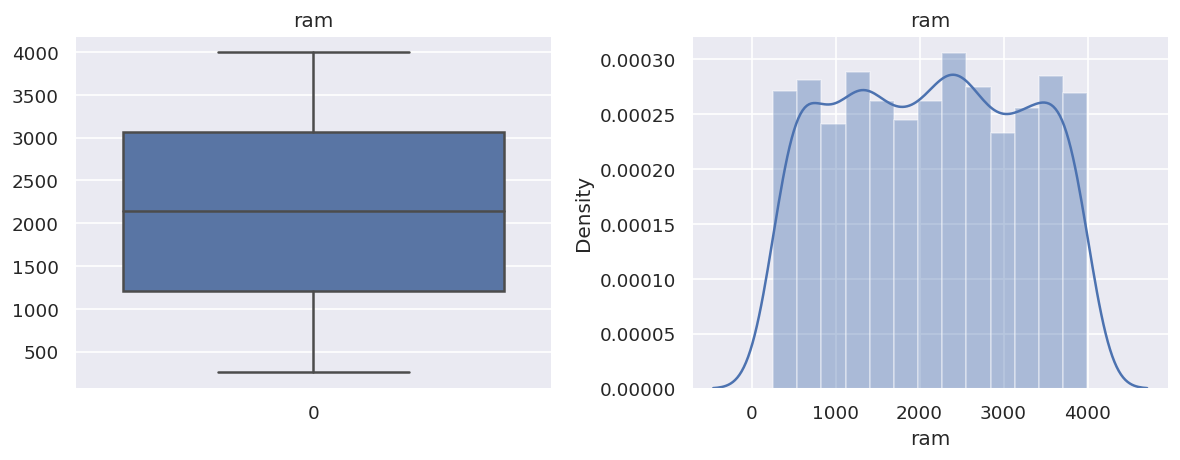

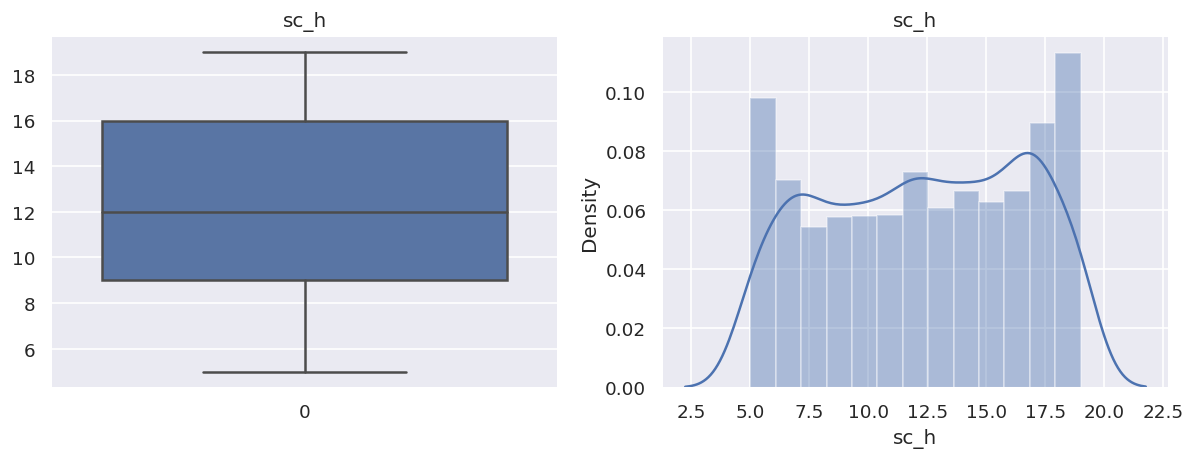

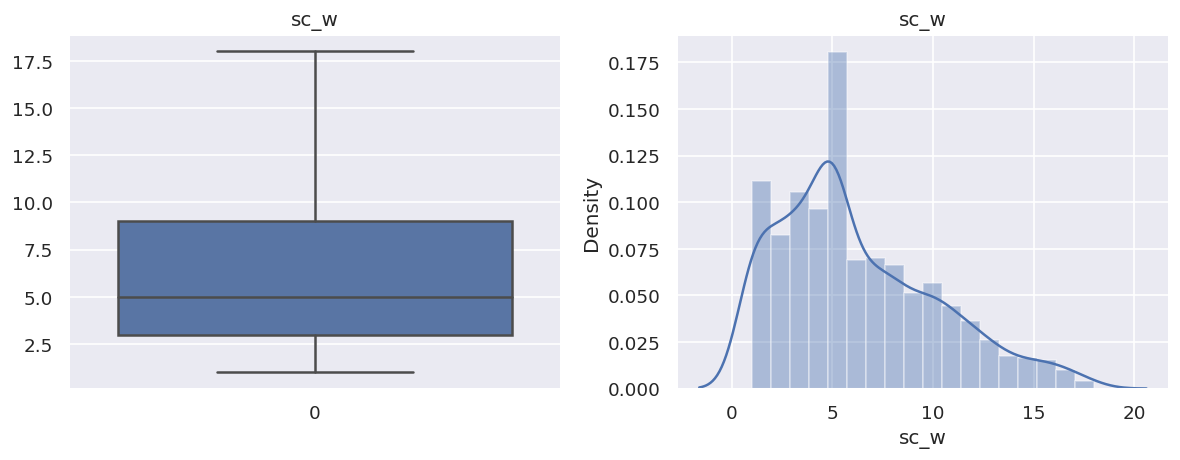

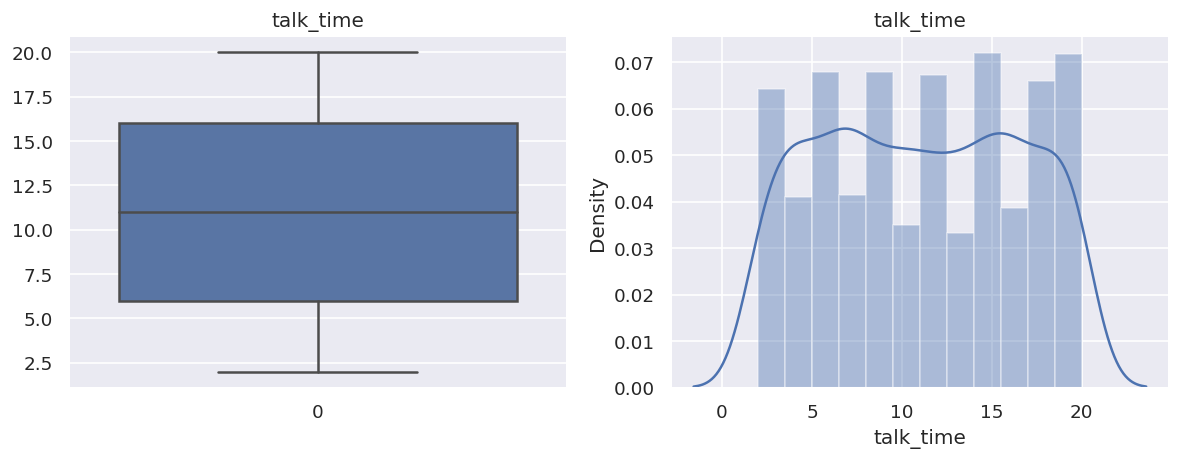

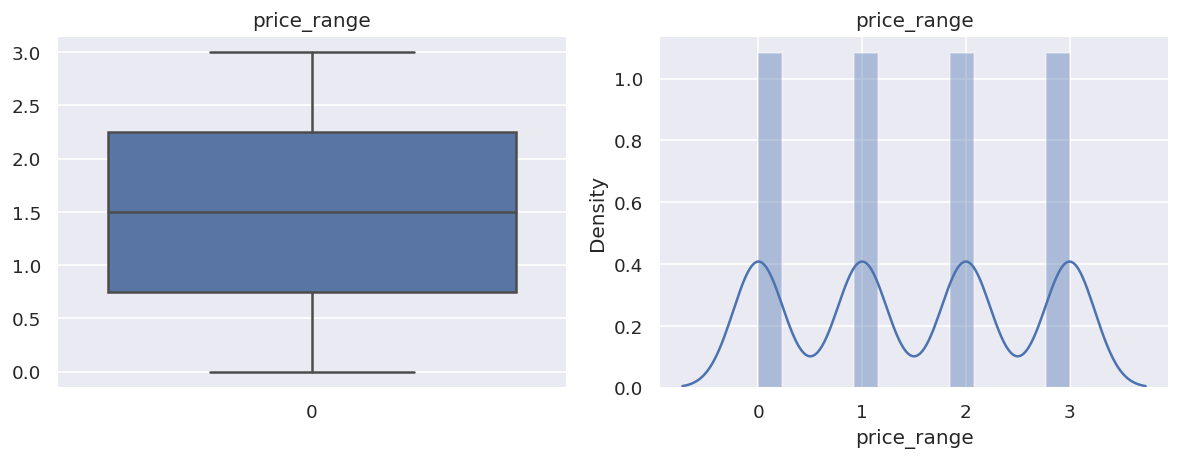

In [21]:
# Perform Univariate Analysis on modified dataframe df
for col in numerical_list:
  #poltting boxplot
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(df[col])
    fig.set_title(col)
  #Plotting displot
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[col])
    fig.set_title(col)
    plt.tight_layout()
    plt.show()

Insights:

1. Outliers are observed in variables such as Front camera and Pixel height..

### 4.2 Bi-variate analysis

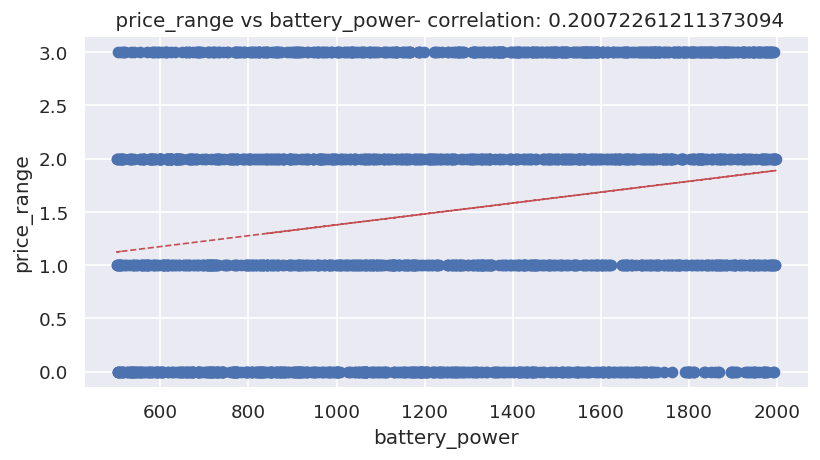

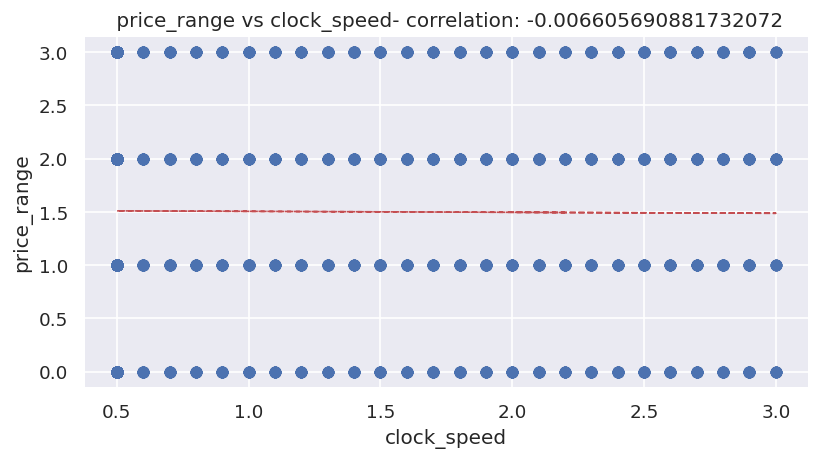

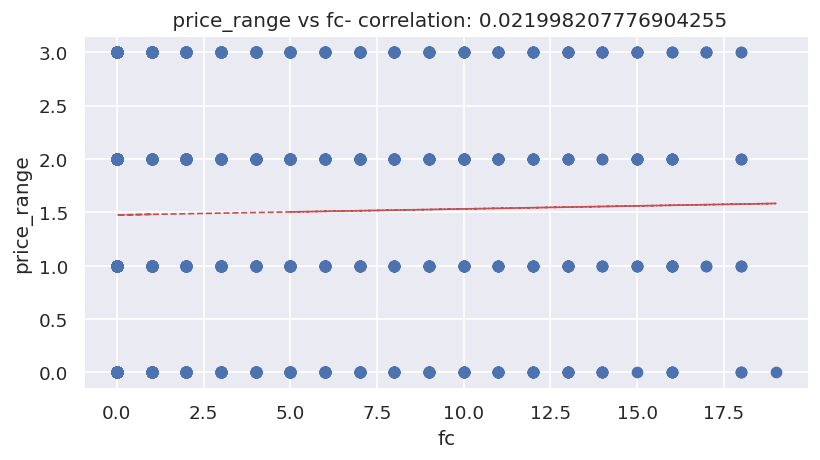

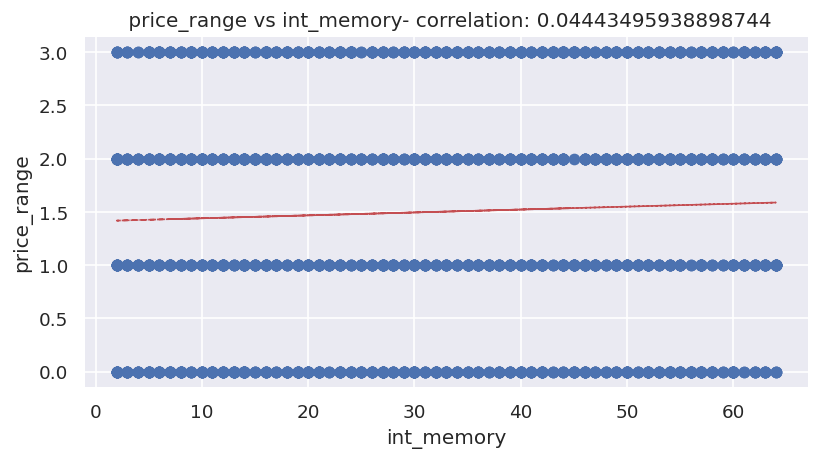

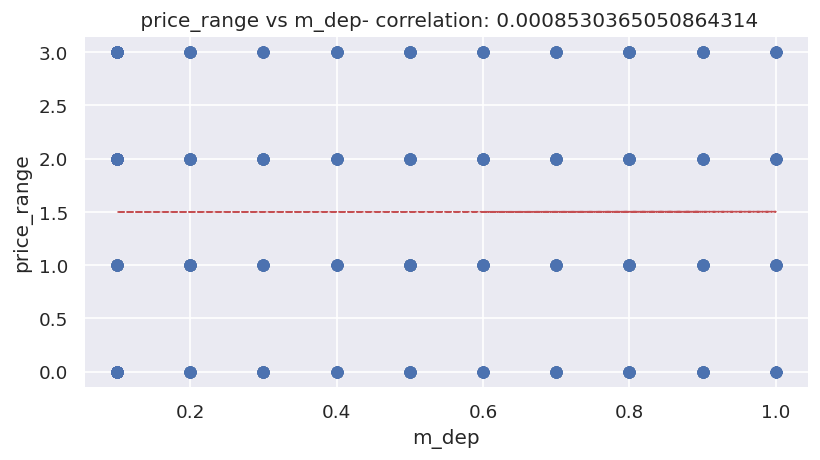

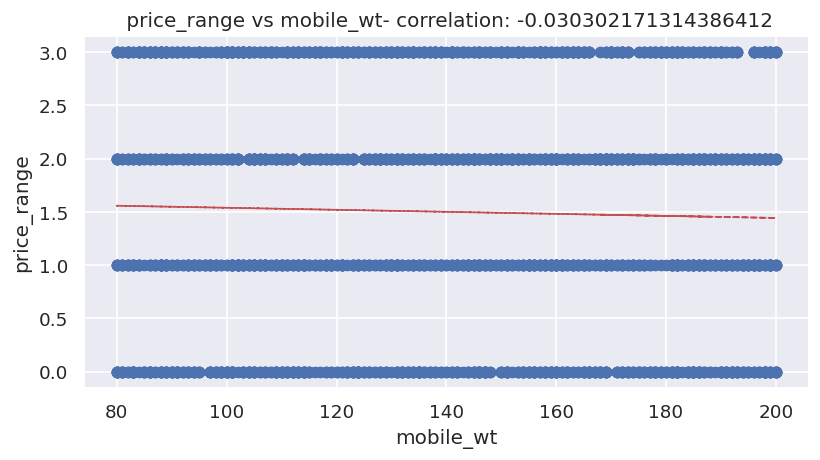

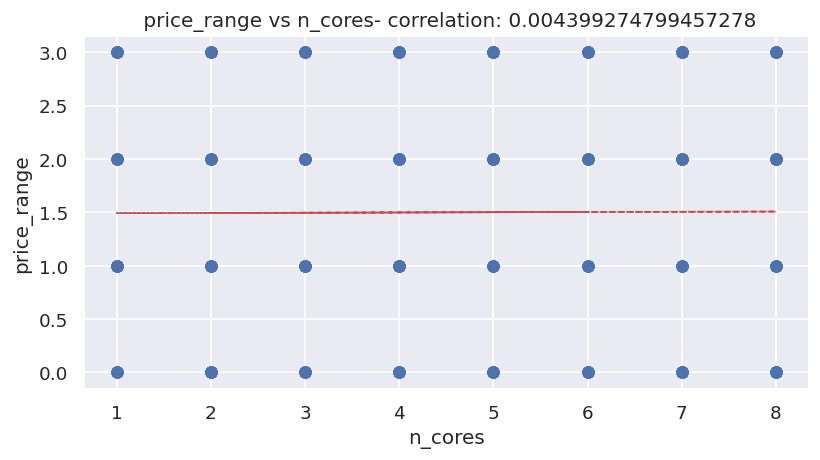

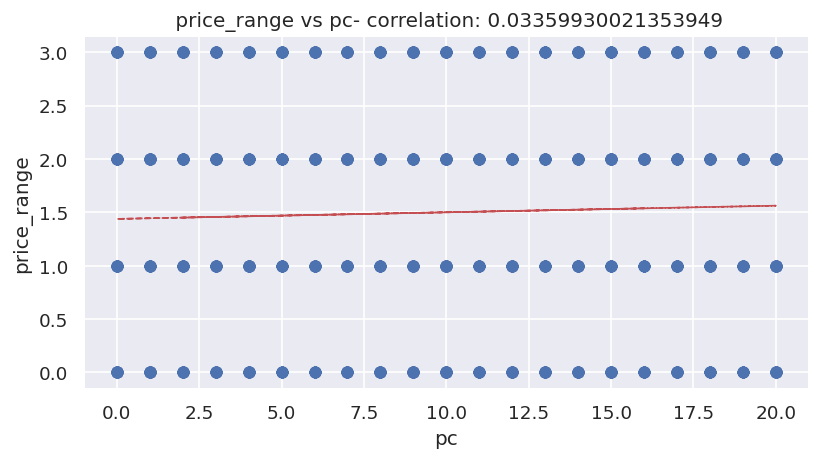

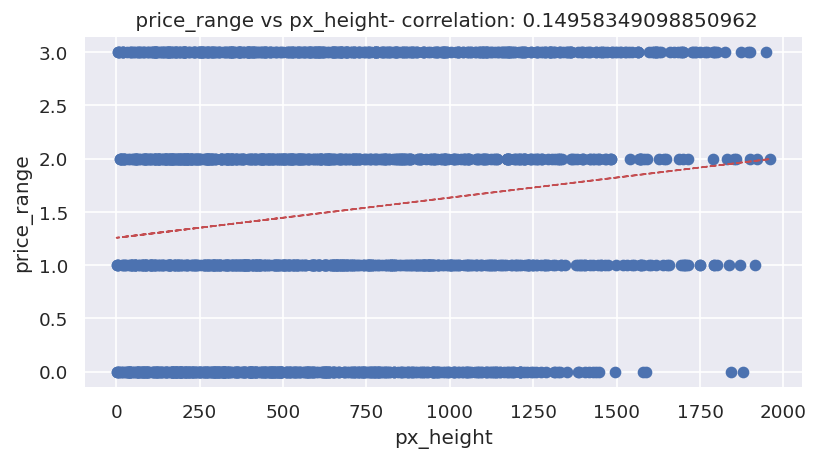

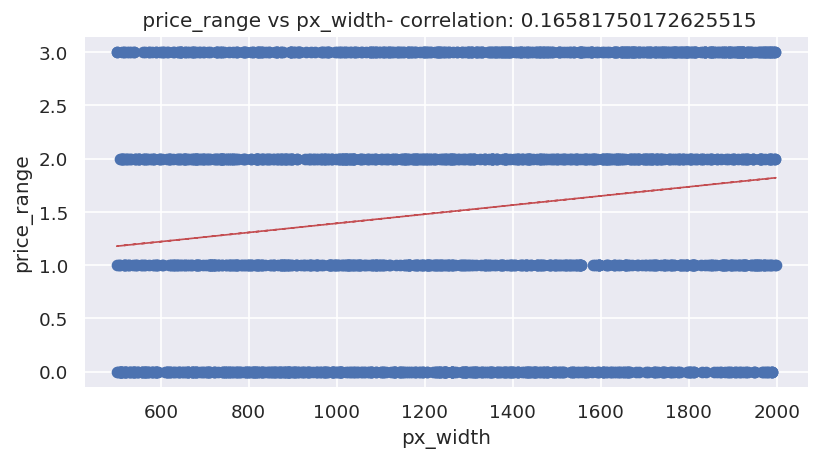

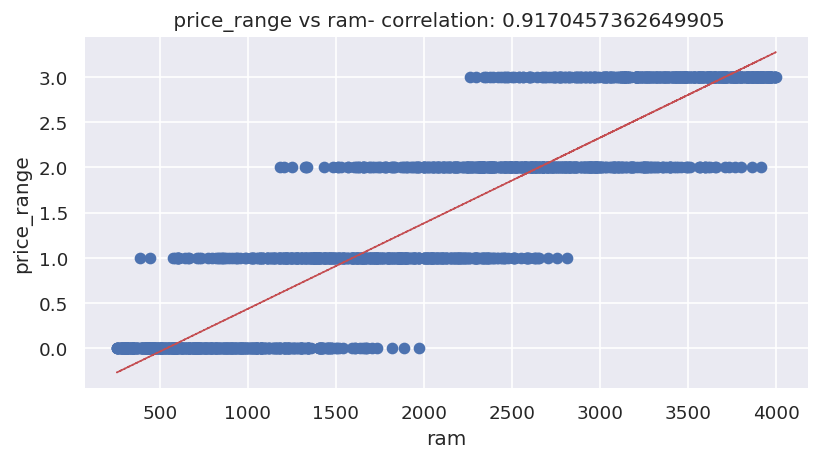

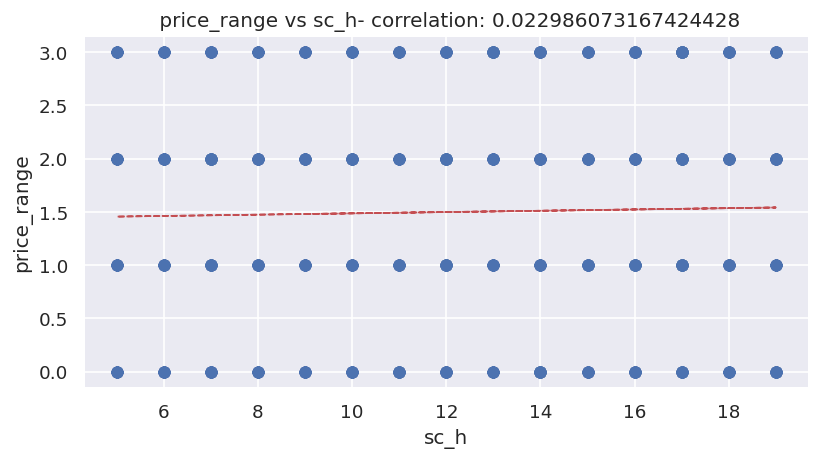

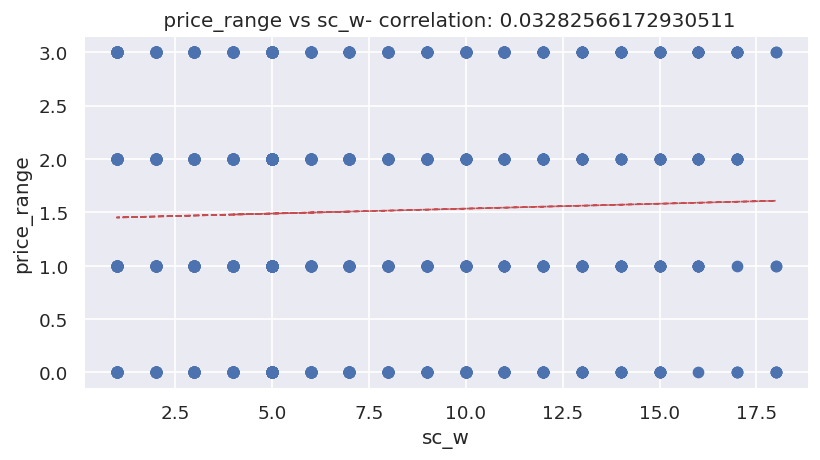

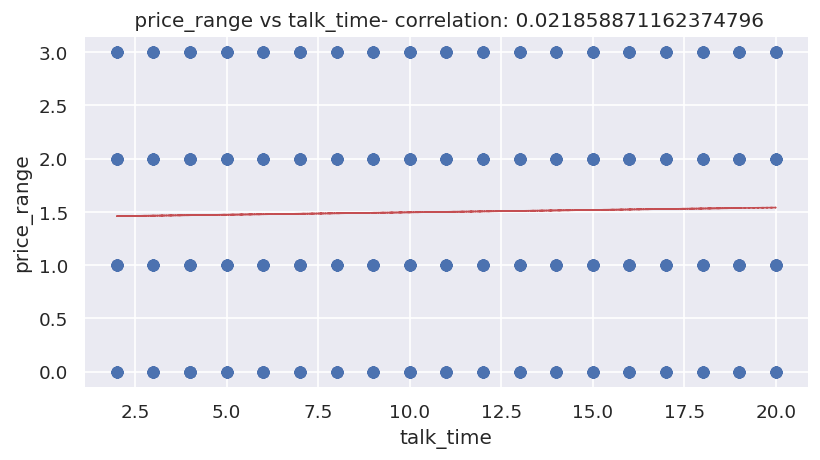

In [22]:
# Cheking Relation Between Price range and independent variables with correlation

for col in numerical_list[:-1]:
  fig = plt.figure(figsize=(7,4))
  ax = fig.gca()
  feature = df[col]
  label = df['price_range']

# Correlation Between Features
  correlation = feature.corr(label)

  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('price_range')

#  Naming Every plot with correlation between variables
  ax.set_title(' price_range vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['price_range'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)
  plt.tight_layout()
  plt.show()


In [23]:
# Finding correlation factor for other variables vs rented bike count
correlation_df = df.corr()['price_range'].drop('price_range')

# Renaming the 'Rented Bike Count' column as 'correlation factor'
correlation_df.rename('correlation factor', inplace=True)

# Reset index and sort values by 'correlation factor' in descending manner
correlation_df = correlation_df.reset_index().rename(columns={'index': 'variable'}).sort_values(by='correlation factor',ascending=False)

# showing correlation coefficients
correlation_df


variable  correlation factor
13            ram            0.917046
0   battery_power            0.200723
12       px_width            0.165818
11      px_height            0.149583
6      int_memory            0.044435
10             pc            0.033599
15           sc_w            0.032826
17        three_g            0.023611
14           sc_h            0.022986
4              fc            0.021998
16      talk_time            0.021859
1            blue            0.020573
19           wifi            0.018785
3        dual_sim            0.017444
5          four_g            0.014772
9         n_cores            0.004399
7           m_dep            0.000853
2     clock_speed           -0.006606
8       mobile_wt           -0.030302
18   touch_screen           -0.030411

### 4.3 Multivariate analysis

<Axes: >

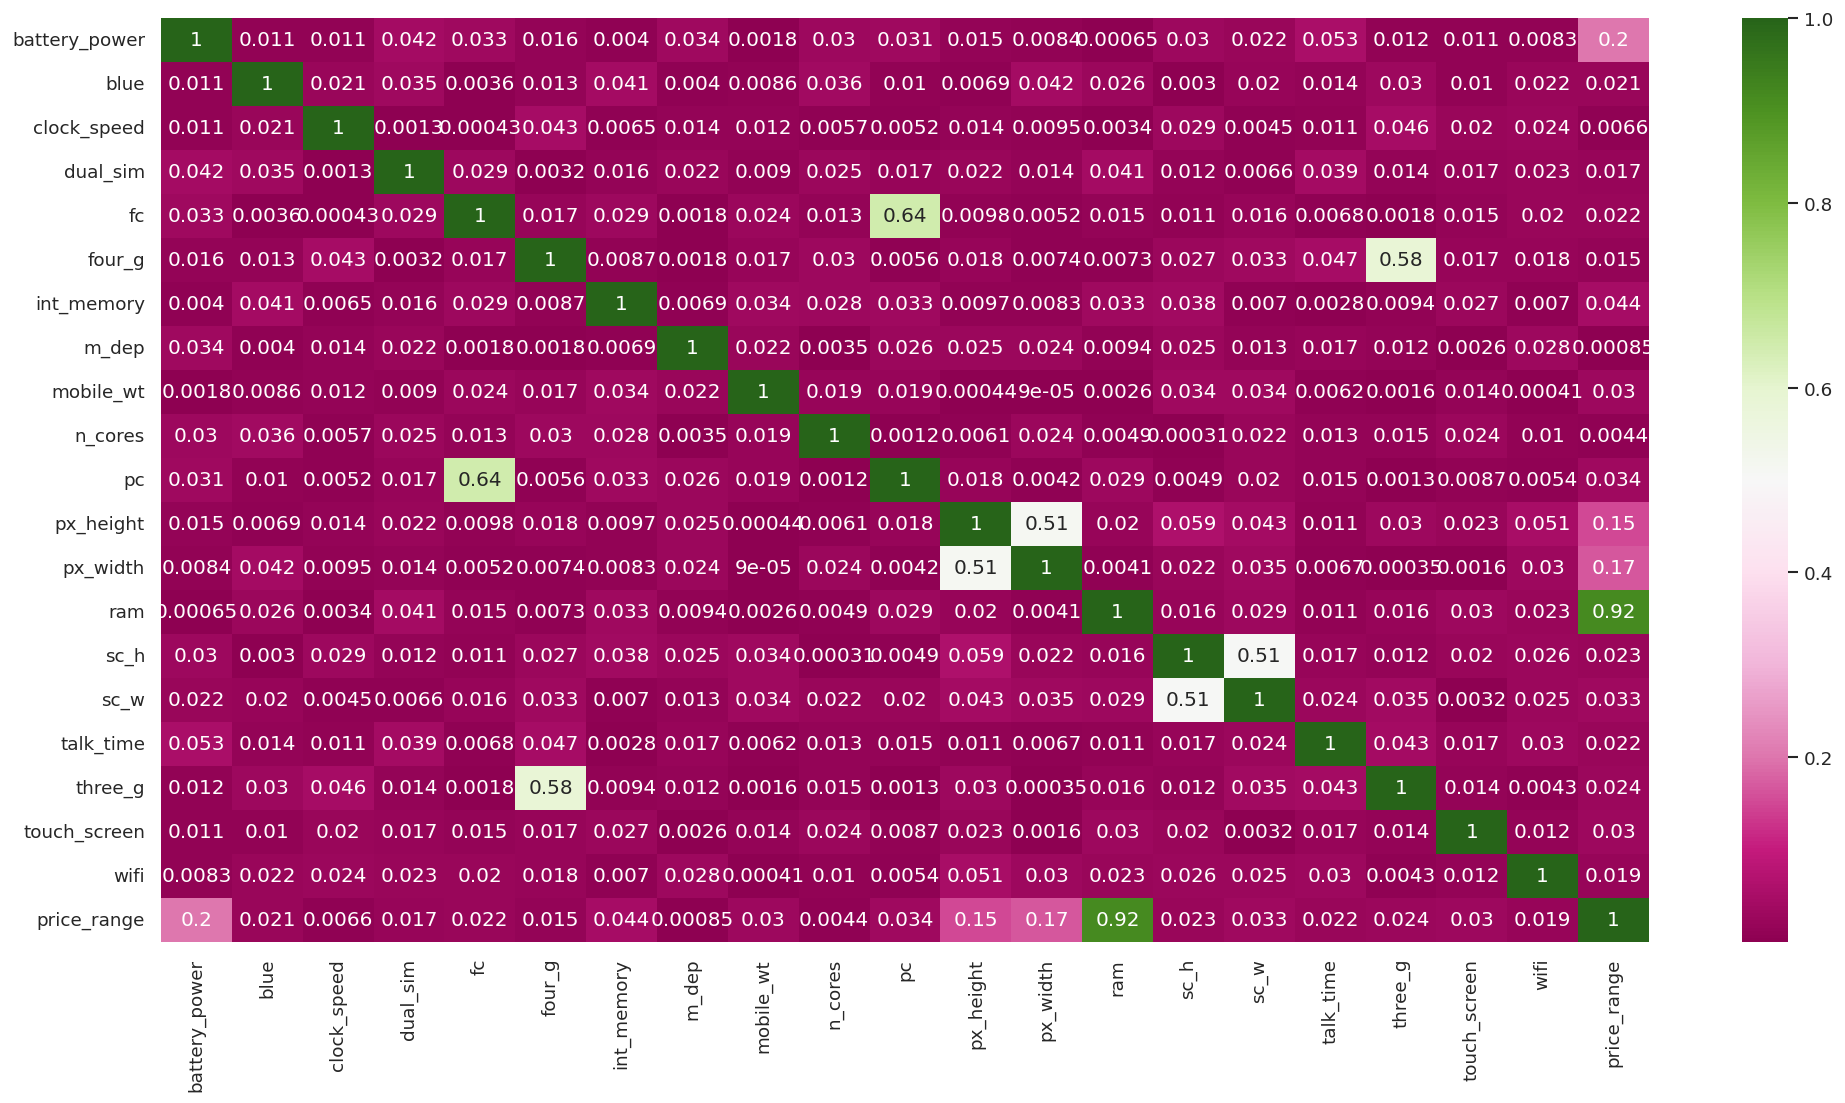

In [24]:
# Chart - 3 visualization code
 ## Correlation for df dataframe
plt.figure(figsize=(20,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='PiYG')

Insights:
1. The heatmap shows that Primary and secondary camera, also pixel width and height, screen height and width have a strong positive correlation, suggesting the presence of multicollinearity between these variables.
2. RAM exhibit a strong correlation with the output variable(Price Range), indicating their significance for further analysis.

###4.4 Finding Multicollinearity

Multicollinearity refers to a situation in which independent variables in a model are highly correlated with each other. It creates issues in interpreting the individual effects of variables and can lead to unstable coefficients and reduced model accuracy. Addressing multicollinearity involves identifying correlated variables and taking steps such as removing or transforming variables.

In [25]:
#checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [26]:
#checking multicolinarity for df
calc_vif(df[[i for i in df.describe().columns]])

variables        VIF
0   battery_power   9.844653
1            blue   1.988476
2     clock_speed   4.354452
3        dual_sim   2.038122
4              fc   3.413010
5          four_g   3.193777
6      int_memory   3.978765
7           m_dep   3.951924
8       mobile_wt  14.708654
9         n_cores   4.708818
10             pc   6.245912
11      px_height   4.642817
12       px_width  12.045645
13            ram  39.786524
14           sc_h  11.937401
15           sc_w   4.650267
16      talk_time   4.915713
17        three_g   6.222405
18   touch_screen   1.999875
19           wifi   2.034742
20    price_range  25.854632

As mobile_wt,px_width,ram,sc_h all this features are important for mobile price in general sense, thats why we are skipping this features

In [27]:
# Finding the VIF for other variables except 'mobile_wt','px_width','ram','sc_h'
calc_vif(df[[i for i in df.describe().columns if i not in ['mobile_wt','px_width','ram','sc_h']]])

variables       VIF
0   battery_power  7.909383
1            blue  1.967967
2     clock_speed  4.074125
3        dual_sim  1.964760
4              fc  3.410536
5          four_g  3.190782
6      int_memory  3.811516
7           m_dep  3.781735
8         n_cores  4.422736
9              pc  6.081369
10      px_height  3.082452
11           sc_w  3.275104
12      talk_time  4.623805
13        three_g  6.007297
14   touch_screen  1.980736
15           wifi  1.991529
16    price_range  3.002180

Here we got variables having VIF less than 10, now we proceed with outliers.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 01--Mobile Price Range Distribution

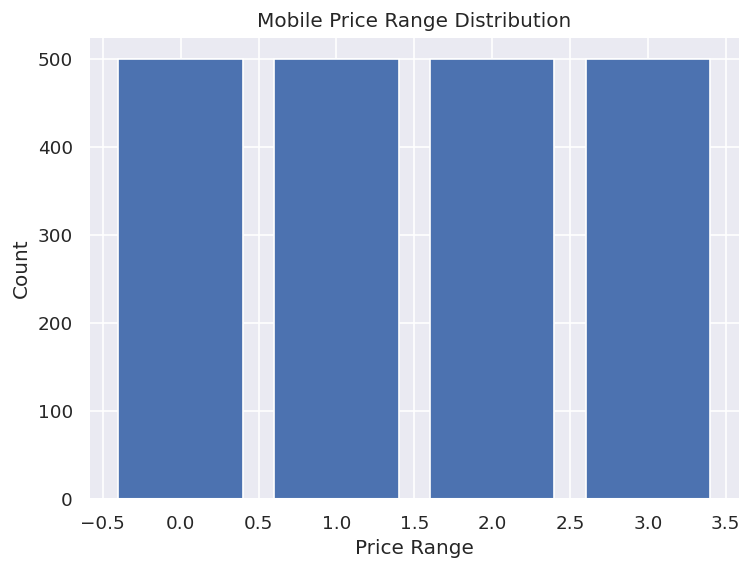

In [28]:
# Count the occurrences of each price range
price_counts = {}
for i in df['price_range']:
    if i not in price_counts:
        price_counts[i] = 1
    else:
        price_counts[i] += 1

# Plot the bar chart
plt.bar(price_counts.keys(), price_counts.values())

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Mobile Price Range Distribution')

# Display the plot
plt.show()

1. This bar plot indicate that there is no data imbalance present.

2. Distibution for each price range is 25% respectively.

#### Chart 02 - Distribution of categorical variables

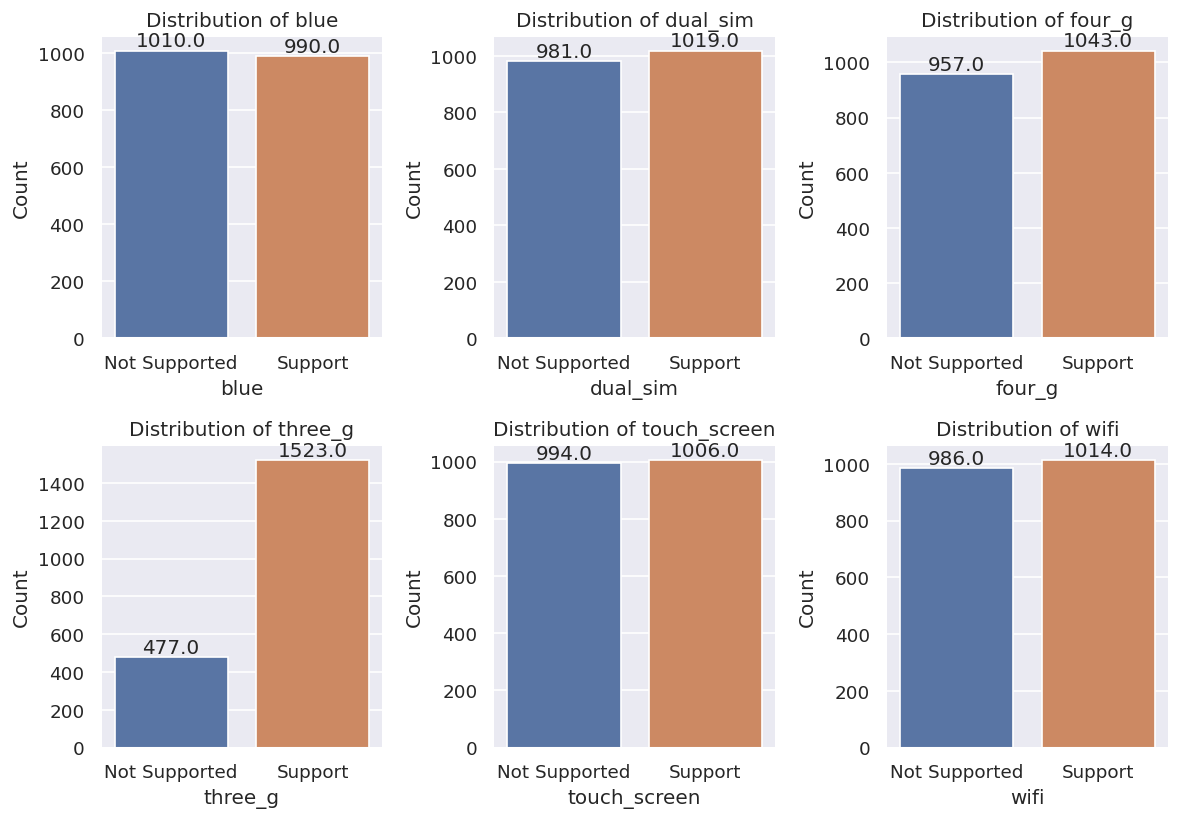

In [29]:
# Create the subplots grid
fig, axes = plt.subplots(2, 3, figsize=(10,7))

# Iterate over categorical variables and corresponding axes
for i, (variable, ax) in enumerate(zip(categorical_list, axes.flatten())):
    # Plot the countplot for the categorical variable
    sns.countplot(data=df, x=variable, ax=ax)

    # Add labels and title
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')
    ax.set_xticklabels(['Not Supported', 'Support'])
    ax.set_title(f'Distribution of {variable}')

    # Add value counts on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Chart 03 - Percentage wise Price Range Distribution of various features

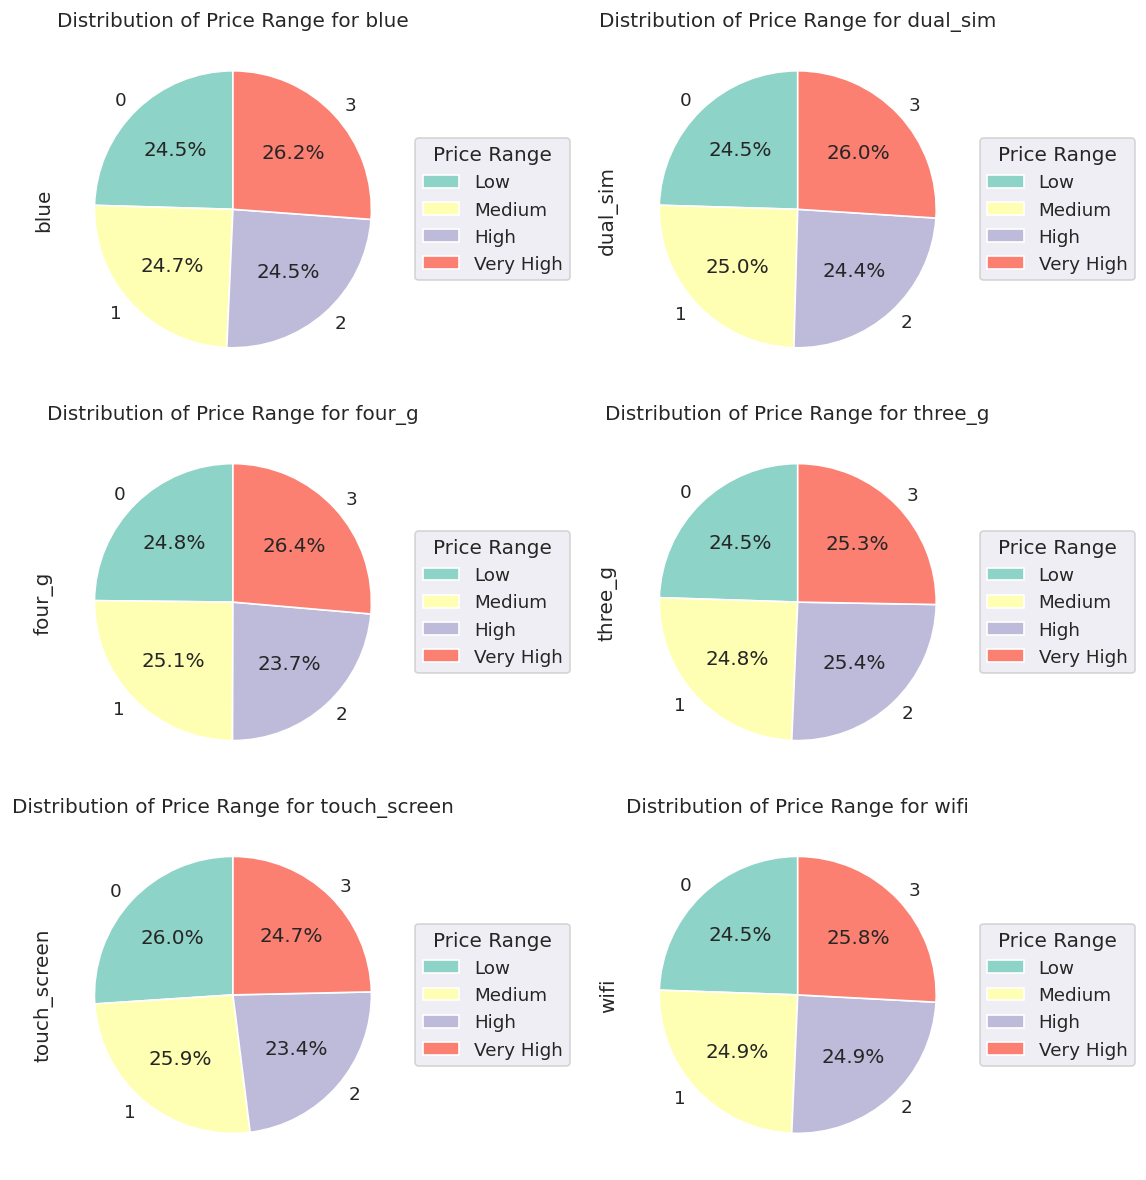

In [30]:
# Grouping the data by price range and calculating the count for each category
grouped_data = df.groupby('price_range')[categorical_list].sum()

# Create a grid layout for the subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Plotting separate pie charts for each categorical feature
for i, feature in enumerate(categorical_list):
    colors = plt.cm.Set3(range(len(grouped_data)))  # Define colors for the pie chart
    explode = [0.1] * len(grouped_data)  # Define the extent to which slices are separated
    pie = grouped_data[feature].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, ax=axs[i])
    pie.set_title(f"Distribution of Price Range for {feature}")

    # Renaming the labels
    pie.legend(['Low', 'Medium', 'High', 'Very High'], loc='center left', bbox_to_anchor=(1, 0.5),title='Price Range')

    # Set equal aspect ratio to ensure circular pie chart
    pie.set_aspect('equal')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#### Chart 04- Distribution of Price Range for various features

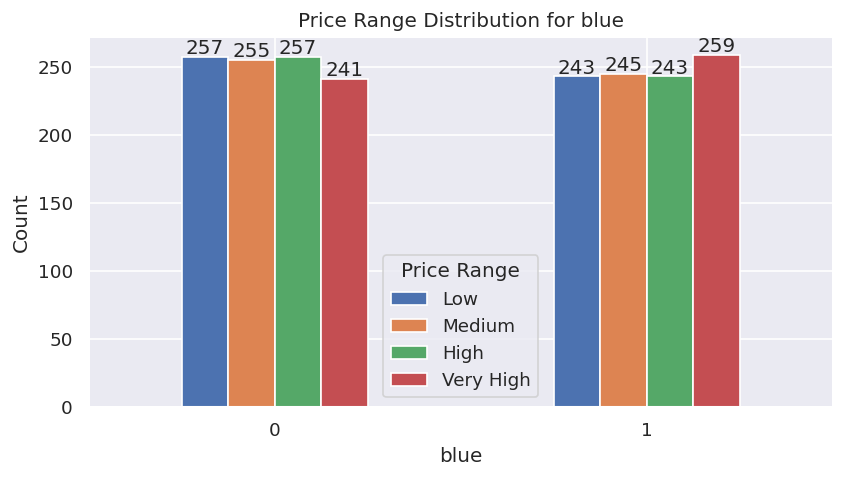

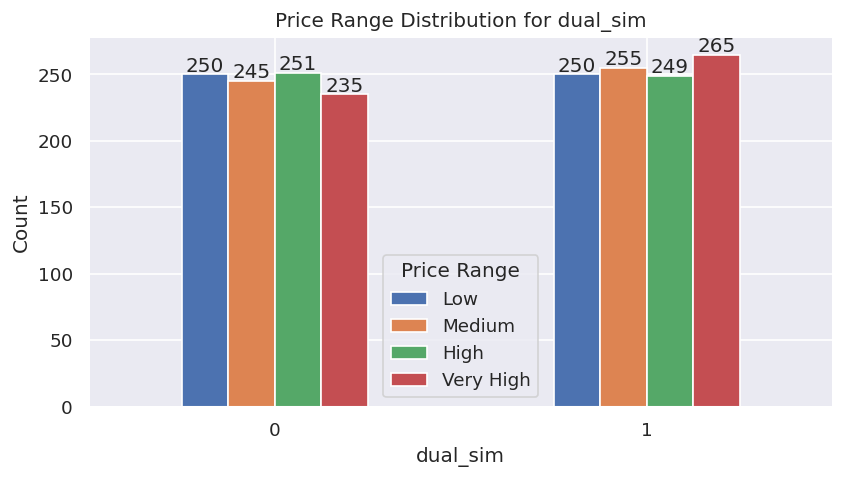

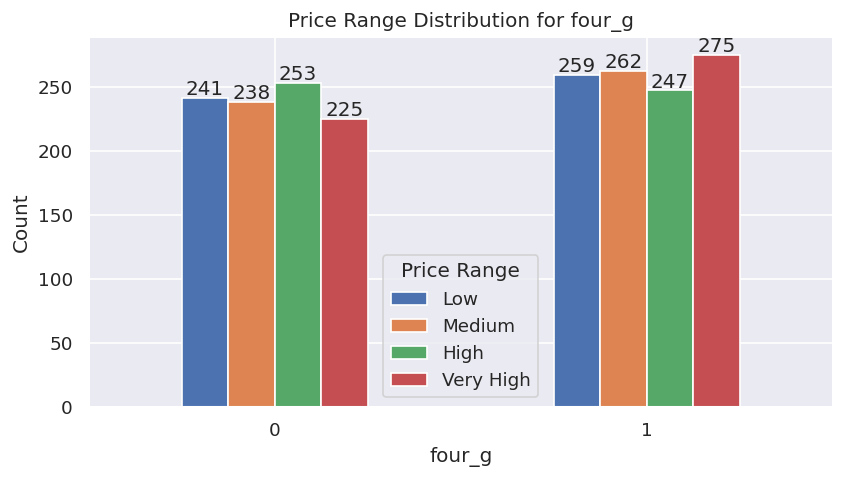

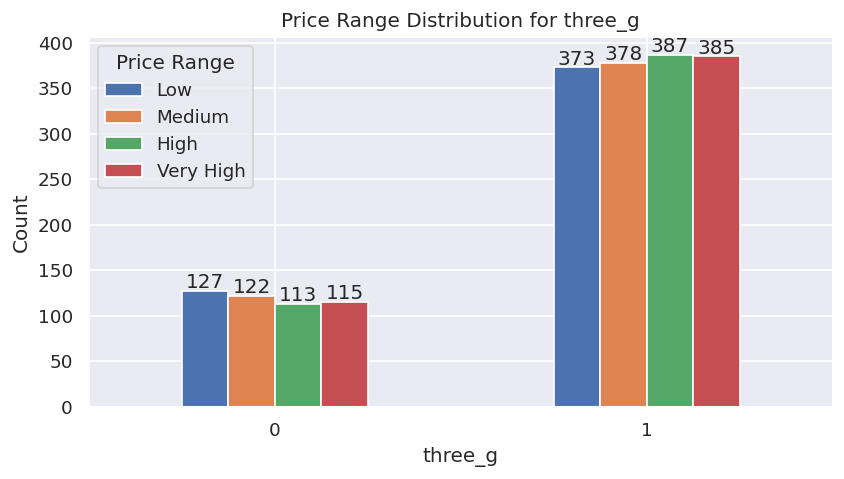

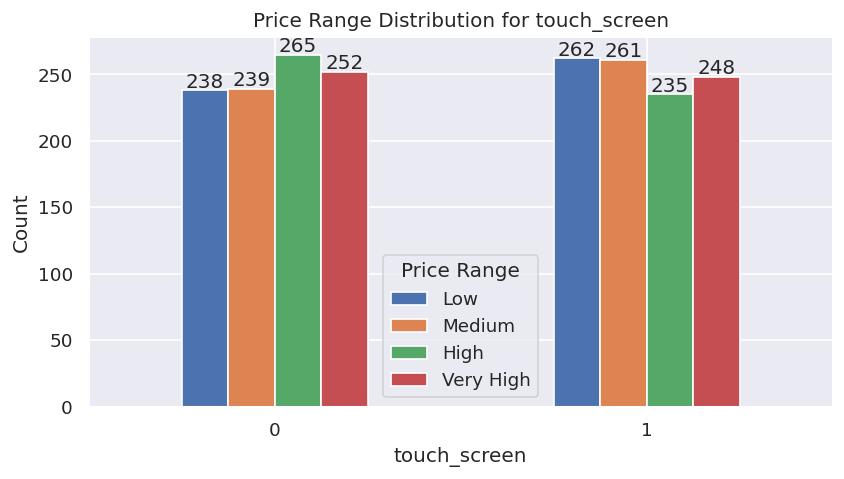

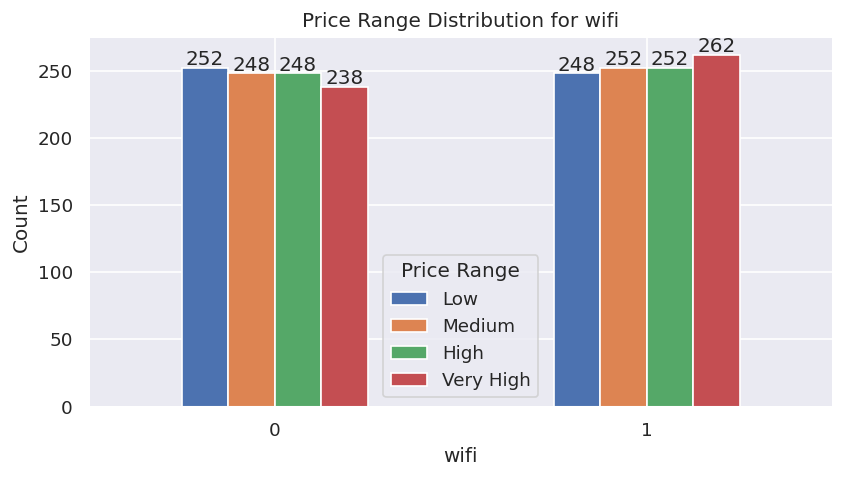

In [31]:
# Iterate over each categorical feature
for feature in categorical_list:
    # Group the data by the categorical feature and calculate the count for each price range
    grouped_data = df.groupby(feature)['price_range'].value_counts().unstack()

    # Plot the bar chart
    ax = grouped_data.plot(kind='bar', layout=(3, 2), figsize=(8, 4))
    plt.title(f'Price Range Distribution for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(['Low', 'Medium', 'High', 'Very High'],title='Price Range')

    # Add values on top of each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the bar chart for the current categorical feature
    plt.show()


#### Chart 05 - Percentage wise distribution of categorical variables.

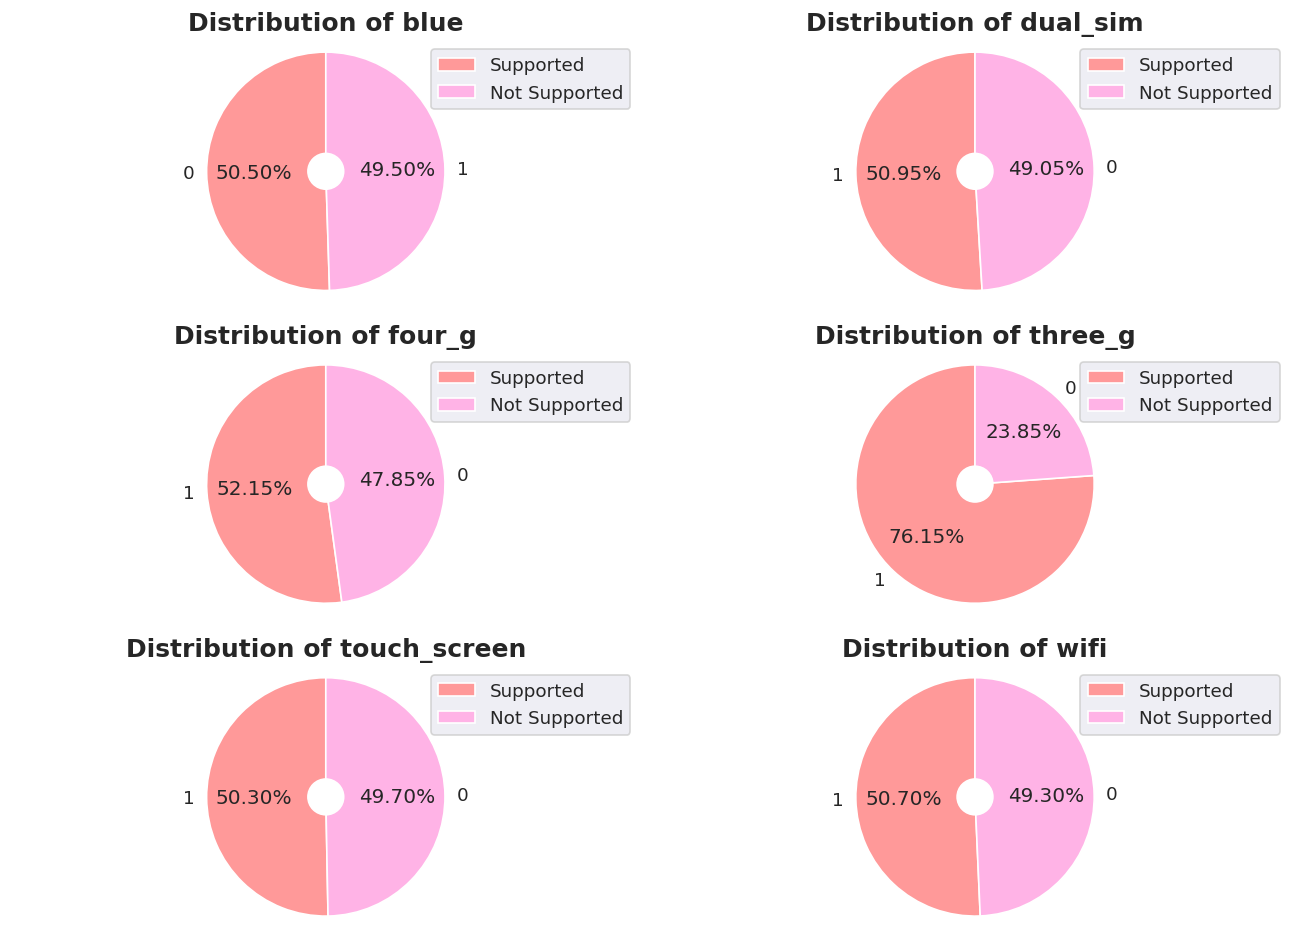

In [32]:
fig, axs = plt.subplots(3, 2, figsize=(11,8))

# Flatten the axes array to simplify indexing
axs = axs.flatten()

for i, feature in enumerate(categorical_list):
    # Count the frequency of each category in the feature
    category_counts = df[feature].value_counts()

    # Plot the pie chart on the corresponding subplot
    colors = ['#ff9999', '#ffb3e6']
    axs[i].pie(category_counts, labels=category_counts.index, autopct='%1.2f%%', colors=colors, startangle=90)

    # Add title
    axs[i].set_title(f'Distribution of {feature}', fontsize=15, fontweight='bold')


    # Customize pie chart aesthetics
    axs[i].axis('equal')  # Equal aspect ratio for a circular shape
    axs[i].set_aspect('equal')  # Set aspect ratio to equal
    axs[i].add_artist(plt.Circle((0, 0), 0.15, color='white'))  # Add shadow
    axs[i].legend(['Supported', 'Not Supported'],loc='upper right')  # Add legend


# Display the chart
fig.tight_layout()
plt.show()


### **EDA Conclusion**

### Detailed Insights from various variables (columns) available in Mobile Price Range Prediction Data as follows:

---

**1. BATTERY POWER**


* Higher battery power may indicate longer battery life, which can be a desirable feature for mobile phone users.

* The correlation coefficient 0.20 suggests that battery power alone has a limited influence on determining the price range of mobile phones..

**2. BLUETOOTH**


* There are 990 mobile phones with bluetooth and 1010 mobile phones without bluetooth function.

* out of 990 mobiles 26.2% are expensive.

**3. CLOCK SPEED**


* Clock speed represents the processing speed of the mobile phone's CPU.
* The correlation coefficient close to zero (-0.006606 ) indicates that there is no significant linear relationship between clock speed and price range. Changes in clock speed do not have a noticeable impact on the pricing of mobile phones.

**4. RAM**


* RAM is positively correlated to Price range with correlation coefficient of 0.92.
* Higher RAM capacities are generally associated with higher-priced phones.

**5.DUAL SIM**


* Total 981 mobile phones do not have dual sim function whereas 1019 phones are dual sim.
* Out of 1019 dual sim phones, 26% (265 phones) are costly.

**6. FRONT CAMERA**


* There are total 474(23.7%) phones with no front camera.
* Distribution is right hand skewed indicated that only few mobiles are available with high front camera specifications.
* Among the 24 mobiles, 6 megapixel cameras are present in 1.2% of them.
Mobiles with a 15 megapixel camera account for 1.1% of the total.
Similarly, mobiles with 14 megapixel, 13 megapixel, 12 megapixel, 11 megapixel, and 10 megapixel cameras account for 1.0%, 2.0%, 2.2%, 2.5%, and 3.1% respectively.

**7. INTERNAL STORAGE**


* the weak positive correlation (correlation coefficient of 0.0444) between the internal memory distribution and the price range suggests that while there is a slight tendency for higher internal memory to be associated with higher price ranges.

**8. 4G CONNECTIVITY**


* 957 Phones do not have 4G connectivity (47.85%)
* 1043 phones have 4G feature.(52.15%)
* 26.4% mobile phones have high price out of 1043 phones.

**9. 3G CONNECTIVITY**


* 447 Phones do not have 3G connectivity (23.85%)
* 1523 phones have 3G feature.(76.15%)
* 25.3% mobile phones have high price out of 1043 phones.

**10. m_dep(MOBILE PHONE DEPTH)**


* The correlation coefficient of 0.000853 indicates a very weak or negligible correlation between mobile thickness and the price range. It suggests that m_dep alone has minimal influence on the pricing of mobile phones.

**11.px_height (PIXEL RESOLUTION HEIGHT)**


*  The moderate positive correlation (correlation coefficient of 0.149583) between pixel height and the price range suggests that higher pixel heights are associated with higher price ranges

**12.px_width (PIXEL RESOLUTION WIDTH)**


* Similarly, the moderate positive correlation (correlation coefficient of 0.165818) between pixel width and the price range suggests that higher pixel widths are associated with higher price ranges.

**13.mobile_wt (MOBILE WEIGHT)**


* the correlation coefficient of -0.030302 suggests a very weak or negligible correlation between mobile weight and the price range. It implies that weight alone has minimal influence on the pricing of mobile phones

**14.WIFI**


* Intotal 1014 mobile phones have WIFI feature.
* 986 mobile phones don't have WIFI.
* Out of 1014 mobiles 24.5% are from low price range and 25.3% are high price range mobiles.

###Handling outliers

In [33]:
def identify_outliers(df, threshold=2):
    """
    Identifies outliers in a DataFrame using the z-score method.

    Args:
        df : Input DataFrame.
        threshold : Z-score threshold for identifying outliers. Default is 2.

    Returns:
        list: List of variables (column names) containing outliers.
    """
    # Calculate the z-scores for each column in the DataFrame
    z_scores = pd.DataFrame(np.abs((df - df.mean()) / df.std()))

    # Find outliers based on the threshold
    outliers = z_scores > threshold

    # Create a list of variables with outliers
    outlier_list = outliers.any().index[outliers.any()].tolist()

    return outlier_list

In [34]:
#Returing list of variables containing outliers and their aggregate numbers for df dataframe

print(f"For dataframe df list of outliers are {identify_outliers(df)}")

#printing counts of outliers columns
print(f"The Numbers of columns with ourliers are {len(identify_outliers(df))} out of {len(df.columns)}")

For dataframe df list of outliers are ['fc', 'px_height', 'sc_w']
The Numbers of columns with ourliers are 3 out of 21


In [35]:
outlier_list=identify_outliers(df)
outlier_list

['fc', 'px_height', 'sc_w']

In [36]:
def skewness_of_df(data):
  skewness_of_columns = []
  for col in data.columns:
    skewness_of_columns.append((col, data[col].skew()))
    skewness_df = pd.DataFrame(skewness_of_columns, columns=['Column', 'Skewness'])
  return skewness_df

In [37]:
# Checking skewness of numerical features
skewness_of_df(df)

Column  Skewness
0   battery_power  0.031898
1            blue  0.020016
2     clock_speed  0.178084
3        dual_sim -0.038035
4              fc  1.019811
5          four_g -0.086144
6      int_memory  0.057889
7           m_dep  0.089082
8       mobile_wt  0.006558
9         n_cores  0.003628
10             pc  0.017306
11      px_height  0.667609
12       px_width  0.014787
13            ram  0.006628
14           sc_h -0.098884
15           sc_w  0.764350
16      talk_time  0.009512
17        three_g -1.228142
18   touch_screen -0.012009
19           wifi -0.028024
20    price_range  0.000000

In [38]:
# Define the columns to remove outliers from
columns_to_clean = ['fc', 'px_height', 'sc_w']

# Define the outlier removal factor (e.g., 1.5 times the IQR)
outlier_factor = 1.5

# Remove outliers from each column
for column in columns_to_clean:
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    iqr_value = iqr(df[column])
    lower_limit = q1 - outlier_factor * iqr_value
    upper_limit = q3 + outlier_factor * iqr_value
    df[column] = np.where((df[column] < lower_limit) | (df[column] > upper_limit), np.nan, df[column])

# Drop rows containing NaN values
df= df.dropna()

### Data Transformation

In [39]:
#our data contains zero values.
#so, We used Yeo-Johnson Transformation,that can handle non positive data as well and it is similar to box-cox transformation

pt = PowerTransformer(method='yeo-johnson')

# select all columns except the last one, as this is classification problem and last column can be concome continuous after transformation
cols_to_transform = df.columns[:-1]

#creating transfrom dataframe
df_transform = pd.DataFrame(pt.fit_transform(df[cols_to_transform]), columns=cols_to_transform)

#reseting the index of df dataframe, as there was problem in adding column to transform dataframe
df = df.reset_index(drop=True)

#reseting the index of df_transform dataframe, as there was problem in adding column to transform dataframe
df_transform = df_transform.reset_index(drop=True)

#adding 'price_range' column from df dataframe to df_transform dataframe.
#transforming label column will result in continuous values, which is not acceptable for for classification problem.
df_transform['price_range'] = df['price_range'].astype(int)

#inspecting transfrom dataframe
df_transform.head()


battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.875838 -0.988950     0.865619 -1.018350 -0.672439 -1.042308   
1      -0.435965  1.011174    -1.347271  0.981981 -1.375150  0.959409   
2      -1.629869  1.011174    -1.347271  0.981981 -0.239768  0.959409   
3      -1.481354  1.011174     1.157381 -1.018350 -1.375150 -1.042308   
4       1.283736  1.011174    -0.283223 -1.018350  1.562028  0.959409   

   int_memory     m_dep  mobile_wt   n_cores  ...  px_height  px_width  \
0   -1.482113  0.387613   1.323069 -1.104375  ...  -2.148170 -1.153279   
1    1.110022  0.713346  -0.082780 -0.620805  ...   0.709796  1.625138   
2    0.551010  1.332325   0.169697  0.259024  ...   1.287232  1.067536   
3   -1.246138  1.027926  -0.224984  0.668215  ...   1.216948  1.213236   
4    0.695128  0.387613   0.058022 -1.104375  ...   1.204840 -0.036652   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  \
0  0.443622 -0.780653  0.391313   1.389712 -1.782474     -1.003035  0.989949   
1  0.512749  1.107790 -0.768529  -0.684491  0.561018      0.996974 -1.010153   
2  0.489210 -0.300370 -1.193977  -0.298045  0.561018      0.996974 -1.010153   
3  0.627799  0.875933  0.609138   0.067439  0.561018     -1.003035 -1.010153   
4 -0.592071 -1.023444 -1.193977   0.751713  0.561018      0.996974 -1.010153   

   price_range  
0            1  
1            2  
2            2  
3            2  
4            1  

[5 rows x 21 columns]

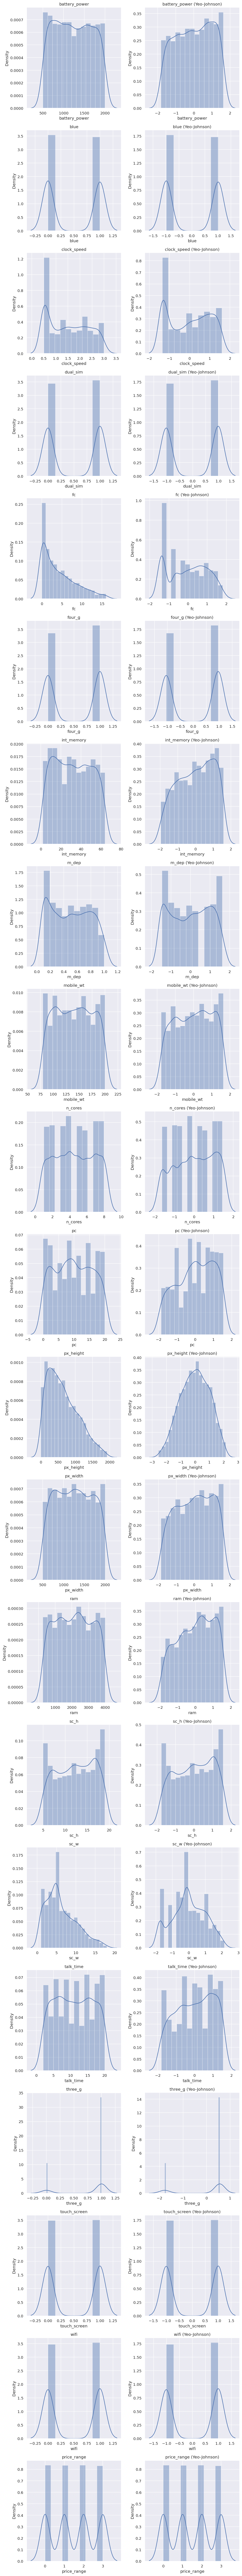

In [40]:
#checking distribution comparision between original and transform dataframe

#dataframe with yeon-johnson transformation
df_transform

# Set up the figure
fig, axes = plt.subplots(len(df.columns), 2, figsize=(10, 5*len(df.columns)))

# Plot the distplots for each column in the original and transformed DataFrames
for i, col in enumerate(df_transform.columns):
    sns.distplot(df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'{col}')

    sns.distplot(df_transform[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} (Yeo-Johnson)')

plt.tight_layout()
plt.show()

In [41]:
#creating dataframe to store skewness of original and transform dataframe
skewness_of_df = pd.DataFrame({'Original': df.skew(), 'Yeo-Johnson': df_transform.skew()})
# Display the resulting table
print("Skewness for df dataframe")
skewness_of_df


Skewness for df dataframe


Original  Yeo-Johnson
battery_power  0.040468    -0.106436
blue           0.022240     0.022240
clock_speed    0.181189    -0.041532
dual_sim      -0.036397    -0.036397
fc             0.945650    -0.035802
four_g        -0.082962    -0.082962
int_memory     0.060594    -0.205216
m_dep          0.086254    -0.034790
mobile_wt      0.006635    -0.077205
n_cores       -0.000866    -0.145231
pc             0.023137    -0.234013
px_height      0.658878    -0.112636
px_width       0.018171    -0.108191
ram            0.005994    -0.198770
sc_h          -0.100504    -0.131387
sc_w           0.757859    -0.037663
talk_time      0.012094    -0.160766
three_g       -1.222383    -1.222383
touch_screen  -0.006065    -0.006065
wifi          -0.020218    -0.020218
price_range    0.001806     0.001806

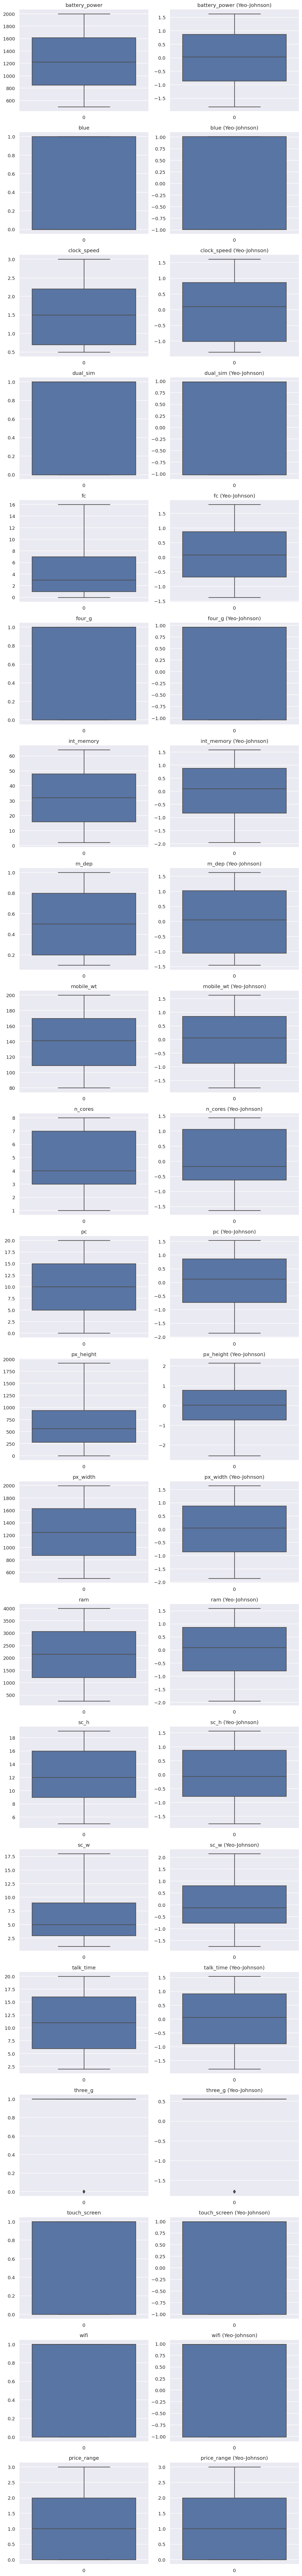

In [42]:
#checking boxplot comparision between original and transform dataframe

#dataframe with yeon-johnson transformation
df_transform

# Set up the figure
fig, axes = plt.subplots(len(df.columns), 2, figsize=(10, 4*len(df.columns)))

# Plot the distplots for each column in the original and transformed DataFrames
for i, col in enumerate(df_transform.columns):
    sns.boxplot(df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'{col}')

    sns.boxplot(df_transform[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} (Yeo-Johnson)')

plt.tight_layout()
plt.show()

##5. ML Model Implementation

####Testing Classification models

In [43]:
def test_classification_models(df, df_name, test_size=0.2, random_state=0):
    """
    Evaluate various classification models on the given dataframe using train-test split.

    Parameters:
        df (pd.DataFrame): The dataframe containing the features and target variable.
        df_name (str): The name of the dataframe for identification in the results.
        test_size (float, optional): The proportion of the dataset to include in the test split.
                                     Default is 0.2.
        random_state (int, optional): The seed used by the random number generator. Default is 0.

    Returns:
        pd.DataFrame: A dataframe containing the evaluation results for each model.
    """
    # Define X and y for the dataframe
    target_variable = "price_range"
    X = df.drop(columns=[target_variable])
    y = df[target_variable]

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Define the models
    models = [
        ("Logistic Regression", LogisticRegression(multi_class='ovr')),
        ("Decision Tree", DecisionTreeClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("SVM", SVC(decision_function_shape='ovr', probability=False)),  # Enable probability estimates for AUC
        ("Naive Bayes", GaussianNB()),
        ("K-Nearest Neighbors", KNeighborsClassifier()),
    ]
    results = []

    # Train and test each model
    for name, model in models:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')

        # It will check if the classifier supports probability estimates using the hasattr (has attribute) function.
        # If the classifier does not support probability estimates, it will set the AUC score to 0.0.
        # It is used for SVM as it does not have predict_proba
        if hasattr(model, "predict_proba"):
            auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')
        else:
            auc = 0.0
        # Append the results to the list
        results.append((name, acc, prec, rec, auc))

    # Create a pandas DataFrame from the results list
    df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'ROC AUC'])

    # Add a column to indicate the name of the dataframe
    df_results['Dataframe'] = df_name

    # Return the results dataframe
    return df_results


In [44]:
# Applying test_classification_models function to original and transformed dataframe

df_list = [df, df_transform]
results_list = [test_classification_models(df, df_name) for df, df_name in zip(df_list, ["df","df_transform"])]

#Combining results obtained from both the dataframes
results_df = pd.concat(results_list, ignore_index=True)
# Printing the result dataframe
results_df

Model  Accuracy  Precision    Recall   ROC AUC     Dataframe
0   Logistic Regression  0.722222   0.713839  0.722222  0.897103            df
1         Decision Tree  0.823232   0.826958  0.823232  0.883164            df
2         Random Forest  0.868687   0.869610  0.868687  0.979649            df
3                   SVM  0.941919   0.942303  0.941919  0.000000            df
4           Naive Bayes  0.792929   0.797550  0.792929  0.958589            df
5   K-Nearest Neighbors  0.916667   0.918231  0.916667  0.986603            df
6   Logistic Regression  0.825758   0.818381  0.825758  0.948673  df_transform
7         Decision Tree  0.830808   0.832468  0.830808  0.888038  df_transform
8         Random Forest  0.871212   0.873264  0.871212  0.979875  df_transform
9                   SVM  0.843434   0.845089  0.843434  0.000000  df_transform
10          Naive Bayes  0.787879   0.792143  0.787879  0.956474  df_transform
11  K-Nearest Neighbors  0.457071   0.497075  0.457071  0.745964  df_transform

#### Classfication models with Cross Validation

In [45]:
# Function to evaluate classification models using cross-validation and hyperparameter tuning
def evaluate_classification_models_with_cv(df, df_name):
    # Define X and y for the dataframe
    target_variable = "price_range"
    X = df.drop(columns=[target_variable])
    y = df[target_variable]

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Define the models with their hyperparameters
    models = [
        ("Logistic Regression", LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000, penalty='l2')),
        ("Decision Tree", DecisionTreeClassifier(criterion='gini')),
        ("Random Forest", RandomForestClassifier(n_estimators=100, max_depth=[10, 50, 100, None], min_samples_split=[2, 5, 10])),
        ("SVM", SVC(decision_function_shape='ovr')),
        ("Naive Bayes", GaussianNB()),
        ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])),
    ]

    results = []

    # Train and test each model with cross-validation
    for name, model in models:
        # Define the parameter grid for the model
        param_grid = {}
        if name == "Logistic Regression":
            param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
        elif name == "Decision Tree":
            param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 5, 10]}
        elif name == "Random Forest":
            param_grid = {'n_estimators': [100, 500, 1000], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10]}
        elif name == "SVM":
            param_grid = {'C': [0.1, 0.5, 1, 5, 10]}
        elif name == "K-Nearest Neighbors":
            param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

        # Perform GridSearchCV to find the best hyperparameters for the model
        cv_model = GridSearchCV(model, param_grid, cv=5)
        cv_model.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = cv_model.predict(X_test)

        # Calculate evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')

        # It will check if the classifier supports probability estimates using the hasattr function.
        # If the classifier does not support probability estimates, it will set the AUC score to 0.0.
        # It is used for SVM as it does not have predict_proba
        if hasattr(cv_model, "predict_proba"):
            auc = roc_auc_score(y_test, cv_model.predict_proba(X_test), multi_class='ovr', average='weighted')
        else:
            auc = 0.0

        # Append the results to the list
        results.append((name, acc, prec, rec, auc))

    # Create a pandas DataFrame from the results list
    df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'ROC AUC'])

    # Add a column to indicate the name of the dataframe
    df_results['Dataframe'] = df_name

    # Return the results dataframe
    return df_results

# Dataframes to be evaluated
df_list = [df, df_transform]

# Evaluate each dataframe using the function
cv_results_list = [evaluate_classification_models_with_cv(df, df_name) for df, df_name in zip(df_list, ["df", "df_transform"])]

# Combine the results for all dataframes
cv_results_df = pd.concat(cv_results_list, ignore_index=True)

# Print the combined results dataframe
cv_results_df


Model  Accuracy  Precision    Recall   ROC AUC     Dataframe
0   Logistic Regression  0.755051   0.745683  0.755051  0.919598            df
1         Decision Tree  0.805556   0.812068  0.805556  0.905445            df
2         Random Forest  0.883838   0.884820  0.883838  0.981373            df
3                   SVM  0.957071   0.958090  0.957071  0.000000            df
4           Naive Bayes  0.792929   0.797550  0.792929  0.958589            df
5   K-Nearest Neighbors  0.911616   0.914842  0.911616  0.991377            df
6   Logistic Regression  0.858586   0.856250  0.858586  0.961361  df_transform
7         Decision Tree  0.815657   0.820708  0.815657  0.893480  df_transform
8         Random Forest  0.873737   0.874968  0.873737  0.981299  df_transform
9                   SVM  0.858586   0.862244  0.858586  0.000000  df_transform
10          Naive Bayes  0.787879   0.792143  0.787879  0.956474  df_transform
11  K-Nearest Neighbors  0.547980   0.567911  0.547980  0.786607  df_transform

In [46]:
#adding a string in "Model" column
cv_results_df["Model"]=cv_results_df["Model"]+" With Cross Validation and Hypertunning"

#inspecting dataframe
cv_results_df

Model  Accuracy  Precision  \
0   Logistic Regression With Cross Validation and ...  0.755051   0.745683   
1   Decision Tree With Cross Validation and Hypert...  0.805556   0.812068   
2   Random Forest With Cross Validation and Hypert...  0.883838   0.884820   
3          SVM With Cross Validation and Hypertunning  0.957071   0.958090   
4   Naive Bayes With Cross Validation and Hypertun...  0.792929   0.797550   
5   K-Nearest Neighbors With Cross Validation and ...  0.911616   0.914842   
6   Logistic Regression With Cross Validation and ...  0.858586   0.856250   
7   Decision Tree With Cross Validation and Hypert...  0.815657   0.820708   
8   Random Forest With Cross Validation and Hypert...  0.873737   0.874968   
9          SVM With Cross Validation and Hypertunning  0.858586   0.862244   
10  Naive Bayes With Cross Validation and Hypertun...  0.787879   0.792143   
11  K-Nearest Neighbors With Cross Validation and ...  0.547980   0.567911   

      Recall   ROC AUC     Dataframe  
0   0.755051  0.919598            df  
1   0.805556  0.905445            df  
2   0.883838  0.981373            df  
3   0.957071  0.000000            df  
4   0.792929  0.958589            df  
5   0.911616  0.991377            df  
6   0.858586  0.961361  df_transform  
7   0.815657  0.893480  df_transform  
8   0.873737  0.981299  df_transform  
9   0.858586  0.000000  df_transform  
10  0.787879  0.956474  df_transform  
11  0.547980  0.786607  df_transform

In [47]:
#creating combined dataframe from both resulted dataframes
combined_mixed_df=pd.concat([results_df,cv_results_df])

#sorting dataframe from highest to lowest accuracy
combined_mixed_df=combined_mixed_df.sort_values('Accuracy',ascending=False)

#finding best accurate dataframe
best_accurate_dataframe=combined_mixed_df['Dataframe'].iloc[0]

#finding best model
best_accurate_model=combined_mixed_df['Model'].iloc[0]

#Accuracy
accuracy=combined_mixed_df['Accuracy'].iloc[0]

#Precision
precision=combined_mixed_df['Precision'].iloc[0]

#Recall
recall=combined_mixed_df['Recall'].iloc[0]

#final conclusion
print(f'{best_accurate_model} model has given highest accuracy for dataframe {best_accurate_dataframe } \nAccuracy: {accuracy} \nPrecision: {precision} \nRecall score of {recall}')




SVM With Cross Validation and Hypertunning model has given highest accuracy for dataframe df 
Accuracy: 0.9570707070707071 
Precision: 0.9580896659707089 
Recall score of 0.9570707070707071


### Conclusion

The SVM model with Cross Validation and Hyperparameter Tuning achieved excellent performance on the mobile price range prediction data with dataframe "df":

**- Accuracy: 95.71%**

**- Precision: 95.81%**

**- Recall: 95.71%**

This indicates the model's ability to accurately predict mobile price ranges with high precision and sensitivity. The optimized hyperparameters contribute to its robustness and generalization capabilities. It is a promising model for practical use in predicting mobile prices based on their features.